# RDKit documentation

Testing RDKit documentation from [RDKit website](https://www.rdkit.org/docs/). 

[![Powered by RDKit](https://img.shields.io/badge/Powered%20by-RDKit-3838ff.svg?logo=)](https://www.rdkit.org/)

## Reading, Drawing, and Writing Molecules

#### Reading single molecules

In [1]:
from rdkit import Chem

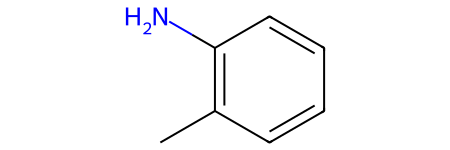

In [2]:
m_from_smiles = Chem.MolFromSmiles('Cc1c(N)cccc1')
m_from_smiles

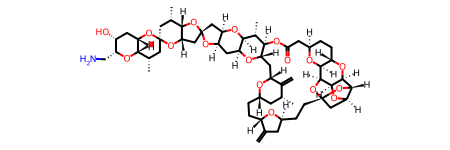

In [3]:
m_from_mol = Chem.MolFromMolFile('./data/input.mol')
m_from_mol

An rdkit.Chem.rdchem.Mol object can be displayed graphically using rdkit.Chem.Draw.MolToImage().

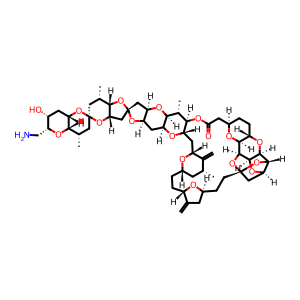

In [4]:
from rdkit.Chem import Draw
Draw.MolToImage(m_from_mol)

some of the error messages are shown below.

In [5]:
m1 = Chem.MolFromSmiles('CO(C)(N)C')

[12:21:25] Explicit valence for atom # 1 O, 4, is greater than permitted


In [6]:
m2 = Chem.MolFromSmiles('c1cc1')

[12:21:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2


In [7]:
m1 is None

True

In [8]:
m2 is None

True

#### Reading sets of molecules

Groups of molecules are read using a Supplier (for example, an rdkit.Chem.rdmolfiles.SDMolSupplier or a rdkit.Chem.rdmolfiles.SmilesMolSupplier).

In [9]:
suppl = Chem.SDMolSupplier('./data/Q9Y233.sdf')
for mol in suppl:
    print(mol.GetNumAtoms())

mols = [x for x in suppl]
print('total mols =', len(mols))

25
25
24
27
24
23
28
31
22
total mols = 9


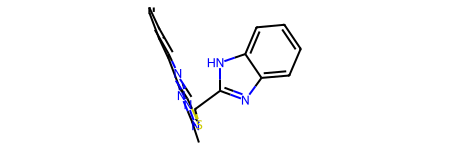

In [10]:
mols[0]

In [11]:
suppl[0].GetNumAtoms()

25

Two good practices when working with Suppliers are to use a context manager and to test each molecule to see if it was correctly read before working with it.

In [12]:
with Chem.SDMolSupplier('./data/Q9Y233.sdf') as suppl:
    for mol in suppl:
        if mol is None:
            continue
        print(mol.GetNumAtoms())

25
25
24
27
24
23
28
31
22


An alternate type of Supplier, the rdkit.Chem.rdmolfiles.ForwardSDMolSupplier can be used to read from file-like objects:

In [13]:
inf = open('./data/Q9Y233.sdf','rb')

with Chem.ForwardSDMolSupplier(inf) as fsuppl:
    for mol in fsuppl:
        if mol is None:
            continue
        print(mol.GetNumAtoms())

25
25
24
27
24
23
28
31
22


This means that they can be used to read from compressed files:

In [14]:
import gzip

inf = gzip.open('./data/chembl26_very_active.sdf.gz')
with Chem.ForwardSDMolSupplier(inf) as gzsuppl:
    ms = [x for x in gzsuppl if x is not None]

len(ms)

[12:21:44] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 50 ignored
[12:21:45] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[12:21:45] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 9 ignored
[12:21:45] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 9 ignored


35767

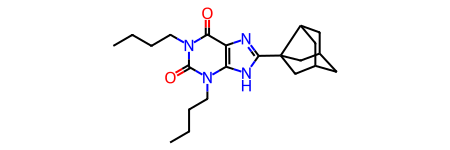

In [26]:
ms[35700]

Note that ForwardSDMolSuppliers cannot be used as random-access objects:

In [15]:
inf = open('./data/Q9Y233.sdf','rb')

with Chem.ForwardSDMolSupplier(inf) as fsuppl:
    fsuppl[0]

TypeError: 'ForwardSDMolSupplier' object is not subscriptable

In [16]:
i = 0
with Chem.MultithreadedSDMolSupplier('./data/Q9Y233.sdf') as sdSupl:
    for mol in sdSupl:
        if mol is not None:
            i += 1
            
print(i)

9


## Writing molecules

In [17]:
mol = Chem.MolFromMolFile('./data/input.mol')
Chem.MolToSmiles(mol)

'C=C1C[C@@H]2CC[C@@]34C[C@H]5O[C@H]6[C@@H](O3)[C@H]3O[C@H](CC[C@@H]3O[C@H]6[C@H]5O4)CC(=O)O[C@@H]3[C@@H](C)[C@@H]4O[C@@H]5C[C@]6(C[C@@H]7O[C@]8(C[C@H](C)[C@@H]9O[C@H](CN)[C@H](O)C[C@@H]9O8)C[C@H](C)[C@@H]7O6)O[C@@H]5C[C@@H]4O[C@H]3C[C@H]3O[C@@H](CC[C@@H]1O2)C[C@@H](C)C3=C'

In [18]:
Chem.MolToSmiles(mol,isomericSmiles=False)

'C=C1CC2CCC34CC5OC6C(OC7CCC(CC(=O)OC8C(CC9OC(CCC1O2)CC(C)C9=C)OC1CC2OC9(CC2OC1C8C)CC1OC2(CC(C)C8OC(CN)C(O)CC8O2)CC(C)C1O9)OC7C6O3)C5O4'

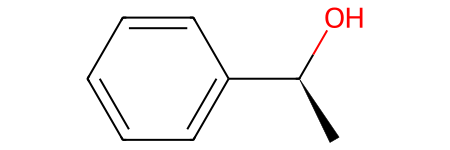

In [19]:
m = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
m

C[C@H](O)c1ccccc1
CC(O)c1ccccc1


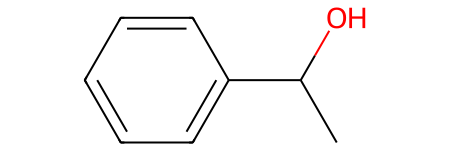

In [20]:
print(Chem.MolToSmiles(m,isomericSmiles=True))
print(Chem.MolToSmiles(m,isomericSmiles=False))
Chem.MolFromSmiles('CC(O)c1ccccc1')

The SMILES provided is canonical, so the output should be the same no matter how a particular molecule is input.

In [21]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')))

c1ccncc1
c1ccncc1
c1ccncc1


For Kekule form of the SMILES, first Kekulize the molecule, then use the “kekuleSmiles” option.

In [22]:
print(Chem.MolToSmiles(m))
Chem.Kekulize(m)
print(Chem.MolToSmiles(m,kekuleSmiles=True))

C[C@H](O)c1ccccc1
C[C@H](O)C1=CC=CC=C1


MDL Mol blocks are also available.

In [23]:
m2 = Chem.MolFromSmiles('C1CCC1')
print(Chem.MolToMolBlock(m2))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [24]:
m2.SetProp("_Name","cyclobutane") # includes name
print(Chem.MolToMolBlock(m2)) 

cyclobutane
     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In order for atom or bond stereochemistry to be recognised correctly by most software, it’s essential that the mol block have atomic coordinates. It’s also convenient for many reasons, such as drawing the molecules. Generating a mol block for a molecule that does not have coordinates will, by default, automatically cause coordinates to be generated. These are not, however, stored with the molecule. Coordinates can be generated and stored with the molecule using functionality in the rdkit.Chem.AllChem module (see the Chem vs AllChem section for more information). Or one can add 3D coordinates by embedding the molecule (this uses the ETKDG method, which is described in more detail below). Note that we add Hs to the molecule before generating the conformer. 

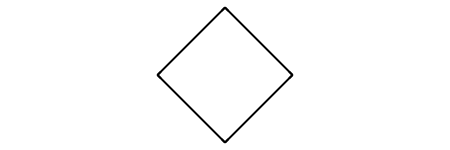

In [25]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m2)
m2

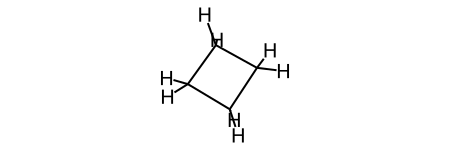

In [26]:
m3 = Chem.AddHs(m2)
params = AllChem.ETKDGv3()
params.randomSeed = 0xf00d # optional random seed for reproducibility
AllChem.EmbedMolecule(m3, params)
m3

If we don’t want the Hs in our later analysis, they are easy to remove.

In [27]:
m3 = Chem.RemoveHs(m3)

To write the molecule to a file, use Python file objects.

In [28]:
print(Chem.MolToMolBlock(m2), file = open('./data/foo.mol', 'w+'))

### Writing sets of molecules
multiple molecules can be written to a file using rdkit.Chem.rdmolfiles.SDWriter object

In [29]:
with Chem.SDWriter('./data/foo.sdf') as w:
    for m in mols:
        w.write(m)

An SDwriter can also be initialised using a file like object.

In [30]:
from io import StringIO
sio = StringIO()
with Chem.SDWriter(sio) as w:
    for m in mols:
        w.write(m)
        
print(sio.getvalue())

2y0j_lig_AXC
     RDKit          3D

 25 29  0  0  1  0  0  0  0  0999 V2000
   22.9400  -14.8940  -31.8840 C   0  0  0  0  0  0  0  0  0  0  0  0
   22.6030  -13.8760  -32.9660 C   0  0  0  0  0  0  0  0  0  0  0  0
   22.1010  -12.6670  -32.7490 N   0  0  0  0  0  0  0  0  0  0  0  0
   22.7850  -14.0980  -34.2620 N   0  0  0  0  0  0  0  0  0  0  0  0
   22.4190  -13.0970  -34.8770 N   0  0  0  0  0  0  0  0  0  0  0  0
   21.9680  -12.1440  -33.9590 C   0  0  0  0  0  0  0  0  0  0  0  0
   21.5040  -10.9220  -34.4360 C   0  0  0  0  0  0  0  0  0  0  0  0
   21.0480   -9.9510  -33.5460 C   0  0  0  0  0  0  0  0  0  0  0  0
   20.5860   -8.7290  -34.0260 C   0  0  0  0  0  0  0  0  0  0  0  0
   20.5840   -8.4820  -35.3990 C   0  0  0  0  0  0  0  0  0  0  0  0
   21.0420   -9.4580  -36.2890 C   0  0  0  0  0  0  0  0  0  0  0  0
   21.5010  -10.6830  -35.8140 C   0  0  0  0  0  0  0  0  0  0  0  0
   21.9390  -11.6150  -36.6840 N   0  0  0  0  0  0  0  0  0  0  0  0
   22.3920  -

## Working with Molecules
##### Looping over atoms and bonds

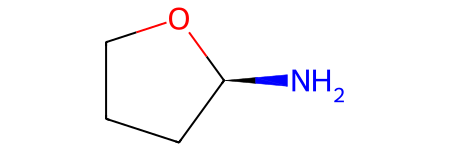

In [31]:
m = Chem.MolFromSmiles('C1C[C@H](N)OC1')
m

In [32]:
print(m.GetAtoms()[0].GetAtomicNum())

6


In [33]:
for atom in m.GetAtoms():
    print(atom.GetAtomicNum())
    print(atom.GetSymbol())

6
C
6
C
6
C
7
N
8
O
6
C


In [34]:
print(m.GetBonds()[0].GetBondType())

SINGLE


In [35]:
for bond in m.GetBonds():
    print(bond.GetBondType())

SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE


In [36]:
m.GetAtomWithIdx(0).GetSymbol()

'C'

In [37]:
m.GetAtomWithIdx(0).GetExplicitValence()

2

In [38]:
m.GetBondWithIdx(0).GetBeginAtomIdx()

0

In [39]:
m.GetBondWithIdx(0).GetEndAtomIdx()

1

In [40]:
m.GetBondBetweenAtoms(0,1).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [41]:
atom = m.GetAtomWithIdx(0)
[x.GetAtomicNum() for x in atom.GetNeighbors()]

[6, 6]

In [42]:
len(atom.GetNeighbors()[-1].GetBonds())

2

#### Ring Information
Atoms and bonds both carry information about the molecule’s rings.

In [43]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
m.GetAtomWithIdx(0).IsInRing()

False

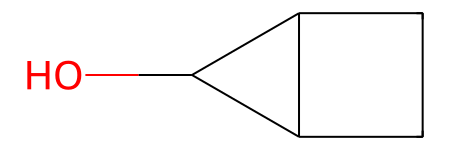

In [44]:
m

In [45]:
Chem.GetDistanceMatrix(m)

array([[0., 1., 2., 2., 3., 3.],
       [1., 0., 1., 1., 2., 2.],
       [2., 1., 0., 1., 2., 1.],
       [2., 1., 1., 0., 1., 2.],
       [3., 2., 2., 1., 0., 1.],
       [3., 2., 1., 2., 1., 0.]])

In [46]:
m.GetAtomWithIdx(1).IsInRing()

True

In [47]:
m.GetAtomWithIdx(0).GetSymbol()

'O'

In [48]:
m.GetAtomWithIdx(2).IsInRingSize(3)

True

In [49]:
m.GetAtomWithIdx(2).IsInRingSize(5)

False

In [50]:
m.GetBondWithIdx(1).IsInRingSize(3)

True

In [51]:
m.GetBondWithIdx(1).IsInRing()

True

But note that the information is only about the smallest rings.

In [52]:
m.GetAtomWithIdx(1).IsInRingSize(5)

False

In [53]:
ssr = Chem.GetSymmSSSR(m)

In [54]:
len(ssr)

2

In [55]:
print(list(ssr[0]))
print(list(ssr[1]))

[1, 2, 3]
[4, 5, 2, 3]


As the name indicates, this is a symmetrized SSSR; if you are interested in the number of “true” SSSR, use the GetSSSR function (note that in this case there’s no difference).

In [56]:
len(Chem.GetSSSR(m))

2

The distinction between symmetrized and non-symmetrized SSSR is discussed in more detail below in the section The SSSR Problem.

For more efficient queries about a molecule’s ring systems (avoiding repeated calls to Mol.GetAtomWithIdx), use the rdkit.Chem.rdchem.RingInfo class.

In [57]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
ri = m.GetRingInfo()
ri.NumAtomRings(0)

0

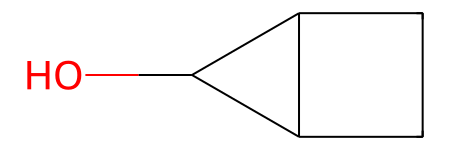

In [58]:
m

In [59]:
ri.AtomRings()

((1, 2, 3), (4, 5, 2, 3))

In [60]:
ri.NumAtomRings(1)

1

In [61]:
ri.IsAtomInRingOfSize(1,3)

True

In [62]:
ri.IsAtomInRingOfSize(1,5)

False

In [63]:
ri.IsAtomInRingOfSize(3,4)

True

#### Modifying molecules
Normally molecules are stored in the RDKit with the hydrogen atoms implicit (e.g. not explicitly present in the molecular graph. When it is useful to have the hydrogens explicitly present, for example when generating or optimizing the 3D geometry, the :py:func:rdkit.Chem.rdmolops.AddHs function can be used.

The Hs can be removed again using the rdkit.Chem.rdmolops.RemoveHs() function.

In [64]:
m=Chem.MolFromSmiles('CCO')
print(m.GetNumAtoms())
m2 = Chem.AddHs(m)
print(m2.GetNumAtoms())

m3 = Chem.RemoveHs(m2)
print(m3.GetNumAtoms())

3
9
3


In [65]:
m = Chem.MolFromSmiles('c1ccccc1')
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

In [66]:
Chem.Kekulize(m)
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.DOUBLE

In [67]:
m.GetBondWithIdx(1).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [68]:
m.GetBondWithIdx(1).GetIsAromatic()

True

In [69]:
m = Chem.MolFromSmiles('c1ccccc1')
m.GetBondWithIdx(0).GetIsAromatic()

True

In [70]:
m1 = Chem.MolFromSmiles('c1ccccc1')
Chem.Kekulize(m1, clearAromaticFlags=True)
m1.GetBondWithIdx(0).GetIsAromatic()

False

Bonds can be restored to the aromatic bond type using the rdkit.Chem.rdmolops.SanitizeMol() function.

In [71]:
Chem.SanitizeMol(m)
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

#### Working with 2D molecules: Generating Depictions
The RDKit has a library for generating depictions (sets of 2D) coordinates for molecules. This library, which is part of the AllChem module, is accessed using the rdkit.Chem.rdDepictor.Compute2DCoords() function. 

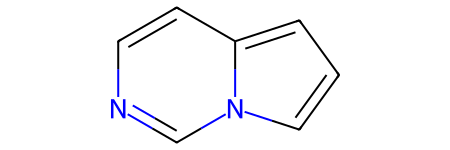

In [72]:
m = Chem.MolFromSmiles('c1nccc2n1ccc2')
m

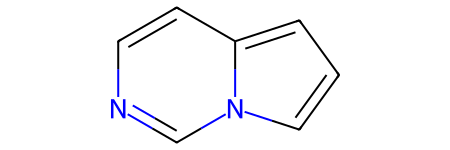

In [73]:
AllChem.Compute2DCoords(m)
m

The 2D conformer is constructed in a canonical orientation and is built to minimize intramolecular clashes, i.e. to maximize the clarity of the drawing.

If you have a set of molecules that share a common template and you’d like to align them to that template, you can do so as follows:

In [74]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)
ms = [Chem.MolFromSmiles(smi) 
      for smi in ('OCCc1ccn2cnccc12',
                  'C1CC1Oc1cc2ccncn2c1',
                  'CNC(=O)c1nccc2cccn12')]

for m in ms:
    _ = AllChem.GenerateDepictionMatching2DStructure(m,template)
    print(m)

Another option for Compute2DCoords allows you to generate 2D depictions for molecules that closely mimic 3D conformers. This is available using the function rdkit.Chem.AllChem.GenerateDepictionMatching3DStructure().

More fine-grained control can be obtained using the core function rdkit.Chem.rdDepictor.Compute2DCoordsMimicDistmat(). 
See the implementation of GenerateDepictionMatching3DStructure in AllChem.py for an example of how it is used.

#### Working with 3D Molecules

The RDKit can generate conformers for molecules using two different methods. The original method used distance geometry. [1] The algorithm followed is.

1. The molecule’s distance bounds matrix is calculated based on the connection table and a set of rules.
2. The bounds matrix is smoothed using a triangle-bounds smoothing algorithm.
3. A random distance matrix that satisfies the bounds matrix is generated.
4. This distance matrix is embedded in 3D dimensions (producing coordinates for each atom).
5. The resulting coordinates are cleaned up somewhat using a crude force field and the bounds matrix.

Note that the conformers that result from this procedure tend to be fairly ugly. They should be cleaned up using a force field. This can be done within the RDKit using its implementation of the Universal Force Field (UFF). 

More recently, there is an implementation of the ETKDG method of Riniker and Landrum which uses torsion angle preferences from the Cambridge Structural Database (CSD) to correct the conformers after distance geometry has been used to generate them. With this method, there should be no need to use a minimisation step to clean up the structures.

More detailed information about the conformer generator and the parameters controlling it can be found in the “RDKit Book”.

Since the 2018.09 release of the RDKit, ETKDG is the default conformer generation method. Since the 2024.03 release ETKDGv3 is the default.

The full process of embedding a molecule is easier than all the above verbiage makes it sound.


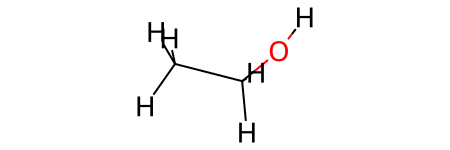

In [75]:
m2=Chem.AddHs(m2)
AllChem.EmbedMolecule(m2)
m2

The RDKit also has an implementation of the MMFF94 force field available. Please note that the MMFF atom typing code uses its own aromaticity model, so the aromaticity flags of the molecule will be modified after calling MMFF-related methods.

Here’s an example of using MMFF94 to minimize an RDKit-generated conformer.

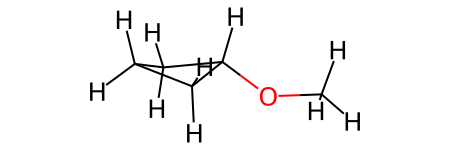

In [76]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2=Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
AllChem.MMFFOptimizeMolecule(m2)
m2

Note the calls to Chem.AddHs() in the examples above. By default RDKit molecules do not have H atoms explicitly present in the graph, but they are important for getting realistic geometries, so they generally should be added. They can always be removed afterwards if necessary with a call to Chem.RemoveHs().

With the RDKit, multiple conformers can also be generated using the different embedding methods. In both cases this is simply a matter of running the distance geometry calculation multiple times from different random start points. The option numConfs allows the user to set the number of conformers that should be generated. Otherwise the procedures are as before. The conformers so generated can be aligned to each other and the RMS values calculated.

In [77]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2=Chem.AddHs(m)
# run ETKDG 10 times
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10)
print(len(cids))
rmslist = []
AllChem.AlignMolConformers(m2, RMSlist=rmslist)
print(len(rmslist))

10
9


In [78]:
rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned=True)
rms

1.2623151307842608

If you are interested in running MMFF94 on a molecule’s conformers (note that this is often not necessary when using ETKDG), there’s a convenience function available.

In [79]:
res = AllChem.MMFFOptimizeMoleculeConfs(m2)

The result is a list a containing 2-tuples: (not_converged, energy) for each conformer. If not_converged is 0, the minimization for that conformer converged.
By default AllChem.EmbedMultipleConfs and AllChem.MMFFOptimizeMoleculeConfs() run single threaded, but you can cause them to use multiple threads simultaneously for these embarassingly parallel tasks via the numThreads argument.

In [80]:
params = AllChem.ETKDGv3()
params.numThreads = 0
cids = AllChem.EmbedMultipleConfs(m2, 10, params)
res = AllChem.MMFFOptimizeMoleculeConfs(m2, numThreads=0)
res

[(0, 10.728830578134016),
 (0, 11.677582320456272),
 (0, 10.728830577379986),
 (0, 11.677582320251643),
 (0, 11.67758232470411),
 (0, 11.677582322157257),
 (0, 11.677582324112725),
 (0, 10.728830580093012),
 (0, 11.677582320310885),
 (0, 10.728830582145735)]

Setting numThreads to zero causes the software to use the maximum number of threads allowed on your computer.

Disclaimer/Warning: Conformer generation is a difficult and subtle task. The plain distance-geometry 2D->3D conversion provided with the RDKit is not intended to be a replacement for a “real” conformer analysis tool; it merely provides quick 3D structures for cases when they are required. We believe, however, that the newer ETKDG method [18] is suitable for most purposes.

#### Preserving Molecules
Molecules can be converted to and from text using Python’s pickling machinery.

In [81]:
m = Chem.MolFromSmiles('c1ccncc1')
import pickle
pkl = pickle.dumps(m)
m2=pickle.loads(pkl)
Chem.MolToSmiles(m2)

'c1ccncc1'

The RDKit pickle format is fairly compact and it is much, much faster to build a molecule from a pickle than from a Mol file or SMILES string, so storing molecules you will be working with repeatedly as pickles can be a good idea.

The raw binary data that is encapsulated in a pickle can also be directly obtained from a molecule.

In [82]:
binStr = m.ToBinary()

This can be used to reconstruct molecules using the Chem.Mol constructor.

In [83]:
m2 = Chem.Mol(binStr)
Chem.MolToSmiles(m2)
len(binStr)

130

Note that this is smaller than the pickle.

In [84]:
len(binStr) < len(pkl)

True

The small overhead associated with python’s pickling machinery normally doesn’t end up making much of a difference for collections of larger molecules (the extra data associated with the pickle is independent of the size of the molecule, while the binary string increases in length as the molecule gets larger).

Tip: The performance difference associated with storing molecules in a pickled form on disk instead of constantly reparsing an SD file or SMILES table is difficult to overstate. In a test I just ran on my laptop, loading a set of 699 drug-like molecules from an SD file took 10.8 seconds; loading the same molecules from a pickle file took 0.7 seconds. The pickle file is also smaller – 1/3 the size of the SD file – but this difference is not always so dramatic (it’s a particularly fat SD file).

#### Drawing Molecules
The RDKit has some built-in functionality for creating images from molecules found in the rdkit.Chem.Draw package.

In [85]:
img=Draw.MolsToGridImage(ms[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in ms[:8]])

KeyError: '_Name'

In [86]:
img

NameError: name 'img' is not defined

In [87]:
Draw.MolToImage(ms[7], legend=ms[7].GetProp("_Name"))

IndexError: list index out of range

#### showing bond distances

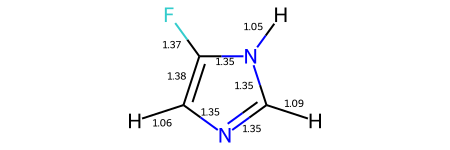

In [88]:
from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdMolTransforms

m = Chem.MolFromSmiles('c1nc[nH]c1F')
mh = Chem.AddHs(m)
# create a 3D conformer for a copy:
mh_cp = Chem.Mol(mh)
rdDistGeom.EmbedMolecule(mh_cp)

conf = mh_cp.GetConformer()

for bnd in mh_cp.GetBonds():
    bl = rdMolTransforms.GetBondLength(conf,bnd.GetBeginAtomIdx(),bnd.GetEndAtomIdx())
    # set the bond note on the other molecule, which we'll draw:
    mh.GetBondWithIdx(bnd.GetIdx()).SetProp('bondNote',f'{bl:.2f}')
mh

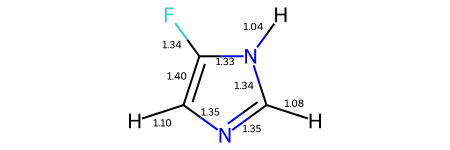

In [89]:
m = Chem.MolFromSmiles('c1nc[nH]c1F')
mh = Chem.AddHs(m)
# create a 3D conformer for a copy:
mh_cp = Chem.Mol(mh)
rdDistGeom.EmbedMolecule(mh_cp)

conf = mh_cp.GetConformer()

for bnd in mh_cp.GetBonds():
    bl = rdMolTransforms.GetBondLength(conf,bnd.GetBeginAtomIdx(),bnd.GetEndAtomIdx())
    # set the bond note on the other molecule, which we'll draw:
    mh.GetBondWithIdx(bnd.GetIdx()).SetProp('bondNote',f'{bl:.2f}')
mh

Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, and bonds likewise can have a coloured outline applied. An obvious use is to show atoms and bonds that have matched a substructure query.

#### highlightling patterns

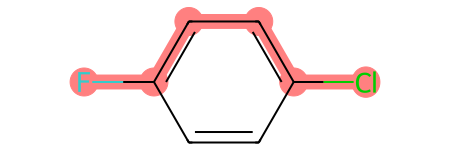

In [90]:
from rdkit.Chem.Draw import rdMolDraw2D

smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')

hit_ats = list(mol.GetSubstructMatch(patt))

hit_bonds = []

for bond in patt.GetBonds():
   aid1 = hit_ats[bond.GetBeginAtomIdx()]
   aid2 = hit_ats[bond.GetEndAtomIdx()]
   hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs

rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)

mol

As of version 2020.03, it is possible to add arbitrary small strings to annotate atoms and bonds in the drawing. The strings are added as properties atomNote and bondNote and they will be placed automatically close to the atom or bond in question in a manner intended to minimise their clash with the rest of the drawing. For convenience, here are 3 flags in MolDraw2DOptions that will add stereo information (R/S to atoms, E/Z to bonds) and atom and bond sequence numbers.

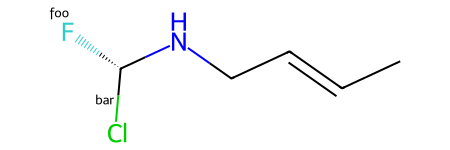

In [91]:
mol = Chem.MolFromSmiles(r'Cl[C@H](F)NC\C=C\C')
d = rdMolDraw2D.MolDraw2DCairo(600, 600) # or MolDraw2DSVG to get SVGs
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('atom_annotation_1.png')

mol

If atoms have an atomLabel property set, this will be used when drawing them.

R1
R2


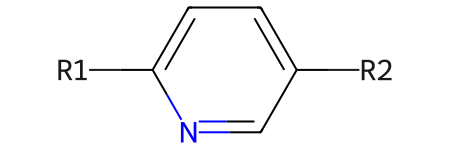

In [92]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
print(mol.GetAtomWithIdx(3).GetProp("atomLabel"))
print(mol.GetAtomWithIdx(7).GetProp("atomLabel"))

mol

[12:22:25] Failed to write PNG file ./images/atom_labels_1.png


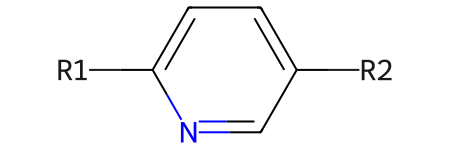

In [93]:
d = rdMolDraw2D.MolDraw2DCairo(300, 300)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_1.png")

mol 

Since the atomLabel property is also used for other things (for example in CXSMILES as demonstrated), if you want to provide your own atom labels, it’s better to use the _displayLabel property.

[12:22:26] Failed to write PNG file ./images/atom_labels_2.png


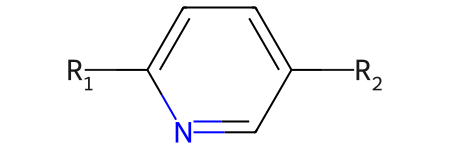

In [94]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
mol.GetAtomWithIdx(3).SetProp("_displayLabel","R<sub>1</sub>")
mol.GetAtomWithIdx(7).SetProp("_displayLabel","R<sub>2</sub>")
d = rdMolDraw2D.MolDraw2DCairo(300, 300)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_2.png")  
mol

[12:22:27] Failed to write PNG file ./images/atom_labels_3.png


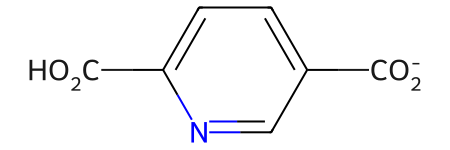

In [95]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
mol.GetAtomWithIdx(3).SetProp("_displayLabel","CO<sub>2</sub>H")
mol.GetAtomWithIdx(3).SetProp("_displayLabelW","HO<sub>2</sub>C")
mol.GetAtomWithIdx(7).SetProp("_displayLabel","CO<sub>2</sub><sup>-</sup>")
mol.GetAtomWithIdx(7).SetProp("_displayLabelW","<sup>-</sup>OOC")
d = rdMolDraw2D.MolDraw2DCairo(250, 250)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_3.png")
mol

#### Metadata in Molecule Images
The PNG files generated by the MolDraw2DCairo class by default include metadata about the molecule(s) or chemical reaction included in the drawing. This metadata can be used later to reconstruct the molecule(s) or reaction.

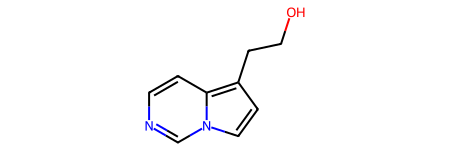

In [96]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)
ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]
_ = [AllChem.GenerateDepictionMatching2DStructure(m,template) for m in ms]
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.DrawMolecule(ms[0])
d.FinishDrawing()
png = d.GetDrawingText()
mol = Chem.MolFromPNGString(png)
Chem.MolToSmiles(mol)
mol

The molecular metadata is stored using standard metadata tags in the PNG and is, of course, not visible when you look at the PNG.
If the PNG contains multiple molecules we can retrieve them all at once using Chem.MolsFromPNGString().

# Substructure Searching
Substructure matching can be done using query molecules built from SMARTS:

In [97]:
m = Chem.MolFromSmiles('c1ccccc1O')
patt = Chem.MolFromSmarts('ccO')
m.HasSubstructMatch(patt)

True

In [98]:
print(m.GetSubstructMatch(patt))
print(m.GetSubstructMatches(patt))

(0, 5, 6)
((0, 5, 6), (4, 5, 6))


In [99]:
patt = Chem.MolFromSmarts('ccO')
matches = []
with Chem.SDMolSupplier('./data/Q9Y233.sdf') as suppl:
  for mol in suppl:
    if mol.HasSubstructMatch(patt):
      matches.append(mol)
len(matches)

7

In [100]:
#smiles vs smarts
m = Chem.MolFromSmiles('C1=CC=CC=C1OC')
print(m.HasSubstructMatch(Chem.MolFromSmarts('CO')))
print(m.HasSubstructMatch(Chem.MolFromSmiles('CCO')))
print(m.HasSubstructMatch(Chem.MolFromSmiles('COC')))
print(m.HasSubstructMatch(Chem.MolFromSmarts('ccOC')))

True
False
True
True


#### Stereochemistry in substructure matches
By default information about stereochemistry is not used in substructure searches

True


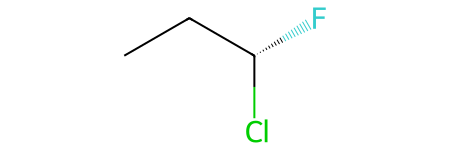

In [101]:
m = Chem.MolFromSmiles('CC[C@H](F)Cl')
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl')))
m

True


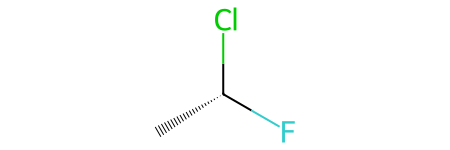

In [102]:
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl')))
Chem.MolFromSmiles('C[C@@H](F)Cl')

True


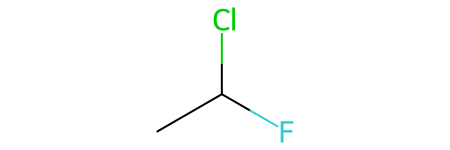

In [103]:
print(m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl')))
Chem.MolFromSmiles('CC(F)Cl')

In [104]:
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True)

True

In [105]:
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'),useChirality=True)

False

In [106]:
m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'),useChirality=True)

True

In [107]:
m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))

True

In [108]:
m2 = Chem.MolFromSmiles('CCC(F)Cl')
m2.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True)

False

#### Atom Map Indices in SMARTS
It is possible to attach indices to the atoms in the SMARTS pattern. This is most often done in reaction SMARTS (see Chemical Reactions), but is more general than that. For example, in the SMARTS patterns for torsion angle analysis published by Guba et al. (DOI: acs.jcim.5b00522) indices are used to define the four atoms of the torsion of interest. This allows additional atoms to be used to define the environment of the four torsion atoms, as in [cH0:1][c:2]([cH0])!@[CX3!r:3]=[NX2!r:4] for an aromatic C=N torsion. We might wonder in passing why they didn’t use recursive SMARTS for this, which would have made life easier, but it is what it is. The atom lists from GetSubstructureMatches are guaranteed to be in order of the SMARTS, but in this case we’ll get five atoms so we need a way of picking out, in the correct order, the four of interest. When the SMARTS is parsed, the relevant atoms are assigned an atom map number property that we can easily extract:

In [109]:
qmol = Chem.MolFromSmarts( '[cH0:1][c:2]([cH0])!@[CX3!r:3]=[NX2!r:4]' )
ind_map = {}
for atom in qmol.GetAtoms() :
    map_num = atom.GetAtomMapNum()
    if map_num:
        ind_map[map_num-1] = atom.GetIdx()
ind_map

{0: 0, 1: 1, 2: 3, 3: 4}

In [110]:
map_list = [ind_map[x] for x in sorted(ind_map)]
map_list

[0, 1, 3, 4]

(1, 7, 5, 8, 10)
[1, 7, 8, 10]


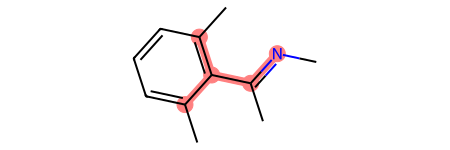

In [111]:
mol = Chem.MolFromSmiles('Cc1cccc(C)c1C(C)=NC')
for match in mol.GetSubstructMatches( qmol ) :
    print(match)
    mas = [match[x] for x in map_list]
    print(mas)

mol

### Advanced substructure matching

Starting with the 2020.03 release, the RDKit allows you to provide an optional function that is used to check whether or not a possible substructure match should be accepted. This function is called with the molecule to be matched and the indices of the matching atoms.

Here’s an example of how you can use the functionality to do “Markush-like” matching, requiring that all atoms in a sidechain are either carbon (type “all_carbon”) or aren’t aromatic (type “alkyl”). We start by defining the class that we’ll use to test the sidechains. 

In [112]:
from rdkit import Chem

class SidechainChecker(object):
  matchers = {
    'alkyl': lambda at: not at.GetIsAromatic(),
    'all_carbon': lambda at: at.GetAtomicNum() == 6
  }

  def __init__(self, query, pName="queryType"):
    # identify the atoms that have the properties we care about
    self._atsToExamine = [(x.GetIdx(), x.GetProp(pName)) for x in query.GetAtoms()
                          if x.HasProp(pName)]
    self._pName = pName

  def __call__(self, mol, vect):
    seen = [0] * mol.GetNumAtoms()
    for idx in vect:
      seen[idx] = 1
    # loop over the atoms we care about:
    for idx, qtyp in self._atsToExamine:
      midx = vect[idx]
      stack = [midx]
      atom = mol.GetAtomWithIdx(midx)
      # now do a breadth-first search from that atom, checking
      # all of its neighbors that aren't in the substructure
      # query:
      stack = [atom]
      while stack:
        atom = stack.pop(0)
        if not self.matchers[qtyp](atom):
          return False
        seen[atom.GetIdx()] = 1
        for nbr in atom.GetNeighbors():
          if not seen[nbr.GetIdx()]:
            stack.append(nbr)
    return True


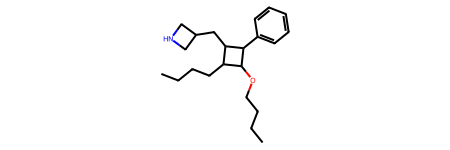

In [113]:
# molecule to use
Chem.MolFromSmiles('C2NCC2CC1C(CCCC)C(OCCCC)C1c2ccccc2')

In [114]:
m = Chem.MolFromSmiles('C2NCC2CC1C(CCCC)C(OCCCC)C1c2ccccc2')
p = Chem.MolFromSmarts('C1CCC1*')
p.GetAtomWithIdx(4).SetProp("queryType", "all_carbon")
m.GetSubstructMatches(p)

((5, 6, 11, 17, 18), (5, 17, 11, 6, 7), (6, 5, 17, 11, 12), (6, 11, 17, 5, 4))

Now let’s add the final check to filter the results.

In [115]:
params = Chem.SubstructMatchParameters()
checker = SidechainChecker(p)
params.setExtraFinalCheck(checker)
m.GetSubstructMatches(p,params)

((5, 6, 11, 17, 18), (5, 17, 11, 6, 7))

Repeat that using the ‘alkyl’ query.

In [116]:
p.GetAtomWithIdx(4).SetProp("queryType", "alkyl")
checker = SidechainChecker(p)
params.setExtraFinalCheck(checker)
m.GetSubstructMatches(p,params)

((5, 17, 11, 6, 7), (6, 5, 17, 11, 12), (6, 11, 17, 5, 4))

#### Chemical Transformations
The RDKit contains a number of functions for modifying molecules. Note that these transformation functions are intended to provide an easy way to make simple modifications to molecules. For more complex transformations, use the Chemical Reactions functionality.

#### Substructure-based transformations
There’s a variety of functionality for using the RDKit’s substructure-matching machinery for doing quick molecular transformations. These transformations include deleting substructures.

In [117]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('C(=O)[OH]')
rm = AllChem.DeleteSubstructs(m,patt)
Chem.MolToSmiles(rm)

'C'

replacing substructures.

In [118]:
repl = Chem.MolFromSmiles('OC')
patt = Chem.MolFromSmarts('[$(NC(=O))]')
m = Chem.MolFromSmiles('CC(=O)N')
rms = AllChem.ReplaceSubstructs(m,patt,repl)
rms

(<rdkit.Chem.rdchem.Mol at 0x3132c8c80>,)

In [119]:
Chem.MolToSmiles(rms[0])

'COC(C)=O'

as well as simple SAR-table transformations like removing side chains.

In [120]:
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceSidechains(m1,core)
Chem.MolToSmiles(tmp)

'[1*]c1cncnc1[2*]'

and removing cores

In [121]:
tmp = Chem.ReplaceCore(m1,core)
Chem.MolToSmiles(tmp)

'[1*]CCBr.[2*]C(=O)O'

By default the sidechains are labeled based on the order they are found. They can also be labeled according by the number of that core-atom they’re attached to.

In [122]:
m1 = Chem.MolFromSmiles('c1c(CCO)ncnc1C(=O)O')
tmp=Chem.ReplaceCore(m1,core,labelByIndex=True)
Chem.MolToSmiles(tmp)

'[1*]CCO.[5*]C(=O)O'

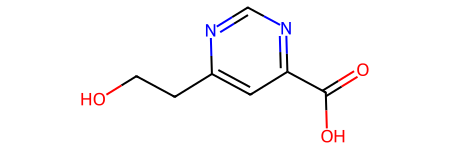

In [123]:
m1

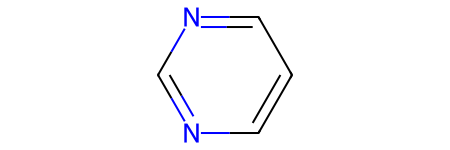

In [124]:
core

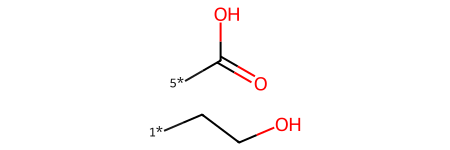

In [125]:
tmp

rdkit.Chem.rdmolops.ReplaceCore() returns the sidechains in a single molecule. This can be split into separate molecules using rdkit.Chem.rdmolops.GetMolFrags().

In [126]:
rs = Chem.GetMolFrags(tmp,asMols=True)
len(rs)

2

In [127]:
Chem.MolToSmiles(rs[0])

'[1*]CCO'

In [128]:
Chem.MolToSmiles(rs[1])

'[5*]C(=O)O'

#### Murcko Decomposition
The RDKit provides standard Murcko-type decomposition of molecules into scaffolds.

In [129]:
from rdkit.Chem.Scaffolds import MurckoScaffold

with Chem.SDMolSupplier('./data/foo.sdf') as cdk2mols:
  m1 = cdk2mols[0]
core = MurckoScaffold.GetScaffoldForMol(m1)
Chem.MolToSmiles(core)

'c1ccc2[nH]c(CSc3nc4ccccc4c4ncnn34)nc2c1'

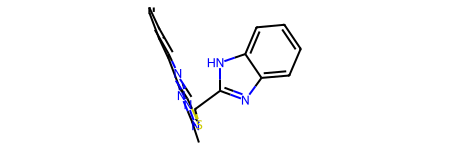

In [130]:
m1

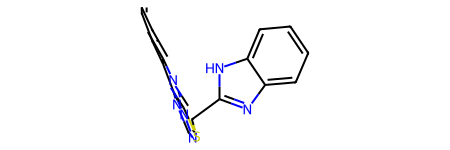

In [131]:
core

In [132]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)
Chem.MolToSmiles(fw)

'C1CCC2CC(CCC3CC4CCCCC4C4CCCC34)CC2C1'

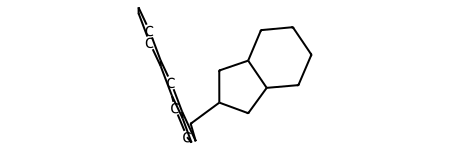

In [133]:
fw

#### Maximum Common Substructure
There are 2 methods for finding maximum common substructures. The first, FindMCS, finds a single fragment maximum common substructure (MCS) of two or more molecules: The second, RascalMCES, finds the maximum common edge substructure (MCES) between two molecules and can return a multi-fragment MCES. 

#### FindMCS
FindMCS operates on 2 or more molecules.

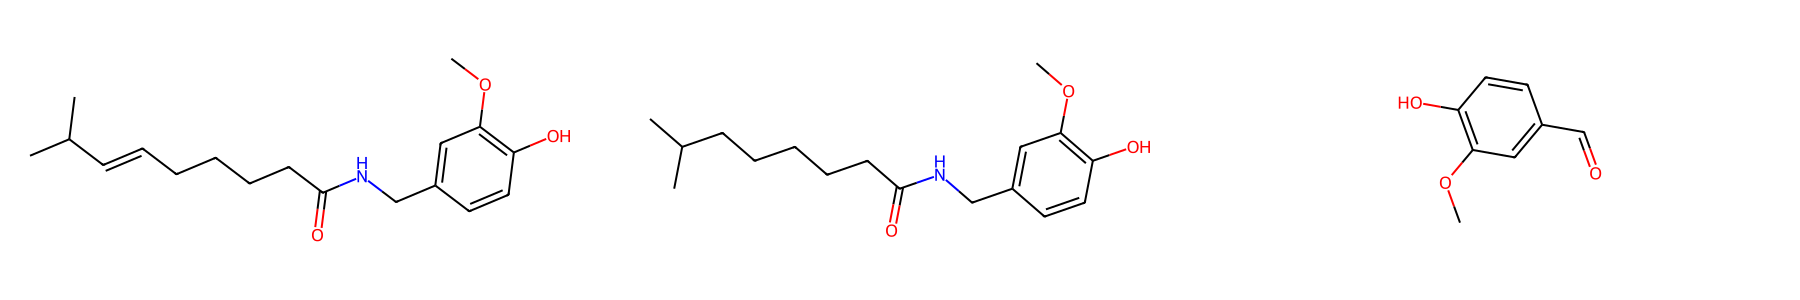

In [134]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mols = [mol1,mol2,mol3]
Draw.MolsToGridImage(mols, subImgSize=(600,300))

In [135]:
res=rdFMCS.FindMCS(mols)
res

In [136]:
(res.numAtoms, res.numBonds), res.smartsString

((10, 10), '[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]')

It returns an MCSResult instance with information about the number of atoms and bonds in the MCS, the SMARTS string which matches the identified MCS, and a flag saying if the algorithm timed out. If no MCS is found then the number of atoms and bonds is set to 0 and the SMARTS to ''.

By default, two atoms match if they are the same element and two bonds match if they have the same bond type. Specify atomCompare and bondCompare to use different comparison functions.

In [137]:
mols = (Chem.MolFromSmiles('NCC'),Chem.MolFromSmiles('OC=C'))
rdFMCS.FindMCS(mols).smartsString

'[#6]'

In [138]:
rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareAny).smartsString

'[#7,#8]-[#6]'

The options for the atomCompare argument are: CompareAny says that any atom matches any other atom, CompareElements compares by element type, and CompareIsotopes matches based on the isotope label. Isotope labels can be used to implement user-defined atom types. A bondCompare of CompareAny says that any bond matches any other bond, CompareOrderExact says bonds are equivalent if and only if they have the same bond type, and CompareOrder allows single and aromatic bonds to match each other, but requires an exact order match otherwise.

In [139]:
rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareAny).smartsString

'[#7,#8]-[#6]'

In [140]:
rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareAny).smartsString

'[#6]-,=[#6]'

In [141]:
mols = (Chem.MolFromSmiles('c1ccccc1'),Chem.MolFromSmiles('C1CCCC=C1'))
rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareAny).smartsString

'[#6]1:,-[#6]:,-[#6]:,-[#6]:,-[#6]:,=[#6]:,-1'

In [142]:
rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareOrderExact).smartsString

'[#6]'

In [143]:
rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareOrder).smartsString

'[#6](:,-[#6]:,-[#6]:,-[#6]):,-[#6]:,-[#6]'

A substructure has both atoms and bonds. By default, the algorithm attempts to maximize the number of bonds found. You can change this by setting the maximizeBonds argument to False. Maximizing the number of bonds tends to maximize the number of rings, although two small rings may have fewer bonds than one large ring.

You might not want a 3-valent nitrogen to match one which is 5-valent. The default matchValences value of False ignores valence information. When True, the atomCompare setting is modified to also require that the two atoms have the same valency.

In [144]:
mols = (Chem.MolFromSmiles('NC1OC1'),Chem.MolFromSmiles('C1OC1[N+](=O)[O-]'))
print(rdFMCS.FindMCS(mols).numAtoms)
print(rdFMCS.FindMCS(mols, matchValences=True).numBonds)

4
3


It can be strange to see a linear carbon chain match a carbon ring, which is what the ringMatchesRingOnly default of False does. If you set it to True then ring bonds will only match ring bonds.

In [145]:
mols = [Chem.MolFromSmiles("C1CCC1CCC"), Chem.MolFromSmiles("C1CCCCCC1")]
rdFMCS.FindMCS(mols).smartsString

'[#6](-[#6]-[#6])-[#6]-[#6]-[#6]-[#6]'

In [146]:
rdFMCS.FindMCS(mols, ringMatchesRingOnly=True).smartsString

'[#6&R](-&@[#6&R]-&@[#6&R])-&@[#6&R]'

Notice that the SMARTS returned now include ring queries on the atoms and bonds.

You can further restrict things and require that partial rings (as in this case) are not allowed. That is, if an atom is part of the MCS and the atom is in a ring of the entire molecule then that atom is also in a ring of the MCS. Setting completeRingsOnly to True toggles this requirement.

In [147]:
mols = [Chem.MolFromSmiles("CCC1CC2C1CN2"), Chem.MolFromSmiles("C1CC2C1CC2")]
rdFMCS.FindMCS(mols).smartsString

'[#6]1-[#6]-[#6](-[#6]-1-[#6])-[#6]'

In [148]:
rdFMCS.FindMCS(mols, ringMatchesRingOnly=True).smartsString

'[#6]1-&@[#6]-&@[#6](-&@[#6]-&@1)-&@[#6&R]'

In [149]:
rdFMCS.FindMCS(mols, completeRingsOnly=True).smartsString

'[#6]1-&@[#6]-&@[#6]-&@[#6]-&@1'

Of course the two options can be combined with each other

In [150]:
ms = [Chem.MolFromSmiles(x) for x in ('CC1CCC1','CCC1CC1',)]
rdFMCS.FindMCS(ms,ringMatchesRingOnly=True).smartsString

'[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R]'

In [151]:
rdFMCS.FindMCS(ms,completeRingsOnly=True).smartsString

'[#6]-&!@[#6]'

In [152]:
rdFMCS.FindMCS(ms,ringMatchesRingOnly=True,completeRingsOnly=True).smartsString

'[#6&!R]-&!@[#6&R]'

The MCS algorithm will exhaustively search for a maximum common substructure. Typically this takes a fraction of a second, but for some comparisons this can take minutes or longer. Use the timeout parameter to stop the search after the given number of seconds (wall-clock seconds, not CPU seconds) and return the best match found in that time. If timeout is reached then the canceled property of the MCSResult will be True instead of False.

In [153]:
mols = [Chem.MolFromSmiles("Nc1ccccc1"*10), Chem.MolFromSmiles("Nc1ccccccccc1"*10)]
rdFMCS.FindMCS(mols, timeout=1).canceled

True

## RascalMCES
RascalMCES can only work on 2 molecules at a time

In [154]:
from rdkit.Chem import rdRascalMCES
mol1 = Chem.MolFromSmiles("CN(C)c1ccc(CC(=O)NCCCCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1 CHEMBL153934")
mol2 = Chem.MolFromSmiles("CN(C)c1ccc(CC(=O)NCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1 CHEMBL152361")
res = rdRascalMCES.FindMCES(mol1, mol2)
print(res[0].smartsString)
print(len(res[0].bondMatches()))

CN(-C)-c1:c:c:c(-CC(=O)-NCCCCCCC):c:c:1.NC12CC3CC(-C1)-CC(-C2)-C3
33


It returns a list of RascalResult objects. Each RascalResult contains the 2 molecules that the result pertains to, the SMARTS string of the MCES, the lists of atoms and bonds in the two molecules that match, the Johnson similarity between the 2 molecules, the number of fragments in the MCES, the number of atoms in the largest fragment and whether the run timed out or not. There is also the method largestFragmentOnly(), which cuts the MCES down to the largest single fragment. This is a non-reversible change, so if you want both results, take a copy first.

By default, the MCES algorithm returns the first result it finds of maximum size. Because of symmetry, there may be other equivalent solutions with the same number of atoms and bonds, but with different equivalent bonds matched to each other. If you want to see all MCESs of maximum size, you can use the option allBestMCESs = True. This will increase the run time, partly because more branches in the search tree must be examined, but mostly because sorting the multiple results is quite time-consuming. The results are returned in a consistent order sorted by number of bond matches, then number of fragments (fewer first), then largest fragment size and so on. Some of these aren’t trivial to compute. The adamantane example above is particularly extreme because not only is there extensive symmetry about the adamantane end and 2-fold symmetry at the phenyl end but also several points of breaking the matching alkyl chain all of which give rise to valid MCESs of the same size. In this case, sorting into a consistent order takes significantly longer than determining the MCESs in the first place.

The MCES differs from a conventional MCS in that it is the maximum common substructure based on bonds rather than atoms. Often the result is the same, but not always.

The Johnson similarity is akin to a Tanimoto similarity, but expressed in terms of the atoms and bonds in the MCES. It is the square of the sum of the number of atoms and bonds in the MCES divided by the product of the sums of the numbers of atoms and bonds in the 2 input molecules. It has values between 0.0 (no MCES between the molecules) and 1.0 (the molecules are identical). A key source of efficiency in the RASCAL algorithm is a fast and correct prediction of a maximum value for the Johnson similarity between 2 molecules and hence the maximum size of the MCES. The first step in the algorithm is then a screening, whereby the full MCES determination is not performed if the predicted similarity is less than some desired threshold. The final similarity between the 2 molecules may be less than the threshold, but it will never be higher than the predicted upper bound. RASCAL stems from RApid Similarity CALulation.

The default settings for RascalMCES are good for general use, but they may be altered by passing an optional RascalOptions object.

In [155]:
mol1 = Chem.MolFromSmiles('Oc1cccc2C(=O)C=CC(=O)c12')
mol2 = Chem.MolFromSmiles('O1C(=O)C=Cc2cc(OC)c(O)cc12')
results = rdRascalMCES.FindMCES(mol1, mol2)
len(results)

0

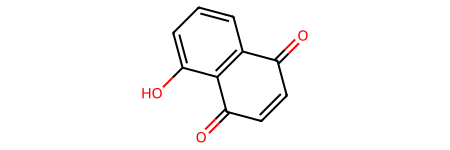

In [156]:
mol1

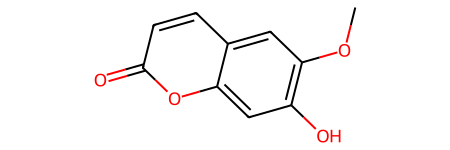

In [157]:
mol2

In [158]:
opts = rdRascalMCES.RascalOptions()
opts.similarityThreshold = 0.5
results = rdRascalMCES.FindMCES(mol1, mol2, opts)
len(results)

1

In [159]:
f'{results[0].similarity:.2f}'

'0.37'

In [160]:
results[0].smartsString

'Oc1:c:c:c:c:c:1.[#6]=O'

In [161]:
opts.minFragSize = 3
results = rdRascalMCES.FindMCES(mol1, mol2, opts)
len(results)

1

In [162]:
f'{results[0].similarity:.2f}'

'0.25'

In [163]:
results[0].smartsString

'Oc1:c:c:c:c:c:1'

In this case, the upper bound on the similarity score is below the default threshold of 0.7, so no results are returned. Setting the threshold to 0.5 produces the second result although, as can be seen, the final similarity is substantially below the threshold. This example also shows a disadvantage of the MCES method, which is that it can produce small fragments in the MCES which are rarely helpful. The option minFragSize can be used to over-ride the default value of -1, which means no minimum size.

Like FindMCS, there is a ringMatchesRingOnly option, and also there’s completeAromaticRings, which is True by default, and means that MCESs won’t be returned with partial aromatic rings matching.

In [164]:
mol1 = Chem.MolFromSmiles('C1CCCC1c1ccncc1')
mol2 = Chem.MolFromSmiles('C1CCCC1c1ccccc1')
results = rdRascalMCES.FindMCES(mol1, mol2, opts)
f'{results[0].similarity:.2f}'

'0.27'

In [165]:
results[0].smartsString

'C1CCCC1-c'

In [166]:
opts.completeAromaticRings = False
results = rdRascalMCES.FindMCES(mol1, mol2, opts)
f'{results[0].similarity:.2f}'

'0.76'

In [167]:
results[0].smartsString

'C1CCCC1-c(:c:c):c:c'

This result may look a bit odd, with a single aromatic carbon in the first SMARTS string. This is a consequence of the fact that the MCES works on matching bonds. A better, atom-centric, representation might be C1CCC[$(C-c)]1. When the completeAromaticRings option is set to False, a larger MCES is found, with just the pyridine nitrogen atom not matching the corresponding phenyl carbon atom.

### Clustering with Rascal

There are 2 clustering methods available using the Johnson metric. The first, RascalCluster, is a fuzzy method described in ‘A Line Graph Algorithm for Clustering Chemical Structures Based on Common Substructural Cores’, JW Raymond, PW Willett (https://match.pmf.kg.ac.rs/electronic_versions/Match48/match48_197-207.pdf also available at https://eprints.whiterose.ac.uk/77598/). The second, RascalButinaCluster, uses the Butina sphere-exclusion algorithm (Butina JCICS 39 747-750 (1999)). Because of the time-consuming nature of the MCES determination, these clustering methods can be slow to run, so are best used on small sets (no more than a few hundred molecules) of small molecules.

### Fingerprinting and Molecular Similarity
The RDKit has a variety of built-in functionality for generating molecular fingerprints and using them to calculate molecular similarity.

The most straightforward and consistent way to get fingerprints is to create a FingeprintGenerator object for your fingerprint type of interest and then use that to calculate fingerprints. Fingerprint generators provide a consistent interface to all the supported fingerprinting methods and allow easy generation of fingerprints as:

bit vectors : fpgen.GetFingerprint
sparse (unfolded) bit vectors : fpgen.GetSparseFingerprint
count vectors : fpgen.GetCountFingerprint
sparse (unfolded) count vectors : fpgen.GetSparseCountFingerprint
Note that there are older, legacy methods of generating fingerprints with the RDKit which are still supported, but these will not be covered here.

### RDKit (Topological) Fingerprints

In [168]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),
Chem.MolFromSmiles('COC')]
fpgen = AllChem.GetRDKitFPGenerator()
fps = [fpgen.GetFingerprint(x) for x in ms]
DataStructs.TanimotoSimilarity(fps[0],fps[1])

0.6

In [169]:
DataStructs.TanimotoSimilarity(fps[0],fps[2])

0.4

In [170]:
DataStructs.TanimotoSimilarity(fps[1],fps[2])

0.25

In [171]:
DataStructs.DiceSimilarity(fps[0],fps[1]) # use different similarity metrics

0.75

Available similarity metrics include Tanimoto, Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey, and Tversky.

More details about the algorithm used for the RDKit fingerprint can be found in the “RDKit Book”.

The default set of parameters used by the fingerprinter is:

minimum path size: 1 bond
maximum path size: 7 bonds
fingerprint size: 2048 bits
number of bits set per hash: 2
You can control these when calling AllChem.GetRDKitFPGenerator().

In [172]:
fpgen = AllChem.GetRDKitFPGenerator(maxPath=2,fpSize=1024)
fps = [fpgen.GetFingerprint(x) for x in ms]
DataStructs.TanimotoSimilarity(fps[0],fps[2])

0.5

### Atom Pairs and Topological Torsions
Atom-pair descriptors [3] are available in several different forms. The standard form is as fingerprint including counts for each bit instead of just zeros and ones. 

In [173]:
ms = [Chem.MolFromSmiles('C1CCC1OCC'),Chem.MolFromSmiles('CC(C)OCC'),Chem.MolFromSmiles('CCOCC')]
fpgen = AllChem.GetAtomPairGenerator()
pairFps = [fpgen.GetSparseCountFingerprint(x) for x in ms]

Because the space of bits that can be included in atom-pair fingerprints is huge, they are stored in a sparse manner. We can get the list of bits and their counts for each fingerprint as a dictionary.

In [174]:
pairFps[-1].GetNonzeroElements()

{541732: 1, 558113: 2, 558115: 2, 558146: 1, 1606690: 2, 1606721: 2}

Unlike most other fingerprint types, descriptions of the bits are directly available.

In [175]:
from rdkit.Chem.AtomPairs import Pairs
Pairs.ExplainPairScore(558115)

(('C', 1, 0), 3, ('C', 2, 0))

The above means: C with 1 neighbor and 0 pi electrons which is 3 bonds from a C with 2 neighbors and 0 pi electrons

The usual metric for similarity between atom-pair fingerprints is Dice similarity. 

In [176]:
from rdkit import DataStructs
DataStructs.DiceSimilarity(pairFps[0],pairFps[1])

0.3333333333333333

In [177]:
DataStructs.DiceSimilarity(pairFps[1],pairFps[2])

0.56

It’s also possible to get atom-pair descriptors encoded as a standard bit vector fingerprint.

In [178]:
pairFps = [fpgen.GetFingerprint(x) for x in ms]
DataStructs.DiceSimilarity(pairFps[0],pairFps[1])

0.35294117647058826

In [179]:
DataStructs.DiceSimilarity(pairFps[0],pairFps[2])

0.26666666666666666

By default the atom pair bit vector fingerprints use a scheme which simulates counts in the bit vectors (described in detail in the “RDKit Book”), but this can be disabled.

In [180]:
fpgen = AllChem.GetAtomPairGenerator(countSimulation=False)
pairFps = [fpgen.GetFingerprint(x) for x in ms]
DataStructs.DiceSimilarity(pairFps[0],pairFps[1])

0.5

Topological torsion descriptors [4] are calculated in essentially the same way.

In [181]:
fpgen = AllChem.GetTopologicalTorsionGenerator()
tts = [fpgen.GetSparseCountFingerprint(x) for x in ms]
DataStructs.DiceSimilarity(tts[0],tts[1])

0.16666666666666666

Topological torsion fingerprints, like atom-pair fingerprints, use a count simulation scheme by default when generating bit vector fingerprints.

### Morgan Fingerprints (Circular Fingerprints)
This family of fingerprints, better known as circular fingerprints [5], is built by applying the Morgan algorithm to a set of user-supplied atom invariants. When generating Morgan fingerprints, the radius of the fingerprint can also be provided (the default is 3). 

In [182]:
from rdkit.Chem import AllChem
fpgen = AllChem.GetMorganGenerator(radius = 2)
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1 = fpgen.GetSparseCountFingerprint(m1)
m2 = Chem.MolFromSmiles('Cc1ncccc1')
fp2 = fpgen.GetSparseCountFingerprint(m2)
DataStructs.DiceSimilarity(fp1,fp2)

0.55

Morgan fingerprints, like atom pairs and topological torsions, are often used as counts, but it’s also possible to calculate them as bit vectors, the default fingerprint size is 2048 bits.

In [183]:
fp1 = fpgen.GetFingerprint(m1)
print(len(fp1))
fp2 = fpgen.GetFingerprint(m2)
DataStructs.DiceSimilarity(fp1,fp2)

2048


0.5185185185185185

The default atom invariants use connectivity information similar to those used for the well known ECFP family of fingerprints. Feature-based invariants, similar to those used for the FCFP fingerprints, can also be used by creating the fingerprint generator with an appropriate atom invariant generator. The feature definitions used are defined in the section Feature Definitions Used in the Morgan Fingerprints. At times this can lead to quite different similarity scores.

In [184]:
m1 = Chem.MolFromSmiles('c1ccccn1')
m2 = Chem.MolFromSmiles('c1ccco1')
fpgen = AllChem.GetMorganGenerator(radius=2)
fp1 = fpgen.GetSparseCountFingerprint(m1)
fp2 = fpgen.GetSparseCountFingerprint(m2)
invgen = AllChem.GetMorganFeatureAtomInvGen()
ffpgen = AllChem.GetMorganGenerator(radius=2, atomInvariantsGenerator=invgen)
ffp1 = ffpgen.GetSparseCountFingerprint(m1)
ffp2 = ffpgen.GetSparseCountFingerprint(m2)

print(DataStructs.DiceSimilarity(fp1,fp2))
print(DataStructs.DiceSimilarity(ffp1,ffp2))

0.36363636363636365
0.9090909090909091


When comparing the ECFP/FCFP fingerprints and the Morgan fingerprints generated by the RDKit, remember that the 4 in ECFP4 corresponds to the diameter of the atom environments considered, while the Morgan fingerprints take a radius parameter. So the examples above, with radius=2, are roughly equivalent to ECFP4 and FCFP4.

The user can also provide their own atom invariants using the optional customAtomInvariants argument to the GetFingerprint() call. Here’s a simple example that uses a constant for the invariant; the resulting fingerprints compare the topology of molecules.

In [185]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
m2 = Chem.MolFromSmiles('Cc1ncncn1')
fpgen = AllChem.GetMorganGenerator(radius=2)
fp1 = fpgen.GetFingerprint(m1,customAtomInvariants=[1]*m1.GetNumAtoms())
fp2 = fpgen.GetFingerprint(m2,customAtomInvariants=[1]*m2.GetNumAtoms())
fp1==fp2

True

Note that bond order is by default still considered

In [186]:
m3 = Chem.MolFromSmiles('CC1CCCCC1')
fp3 = fpgen.GetFingerprint(m3,customAtomInvariants=[1]*m3.GetNumAtoms())
fp1==fp3

False

But this can also be turned off

In [187]:
fpgen = AllChem.GetMorganGenerator(radius=2,useBondTypes=False)
fp1 = fpgen.GetFingerprint(m1,customAtomInvariants=[1]*m1.GetNumAtoms())
fp3 = fpgen.GetFingerprint(m3,customAtomInvariants=[1]*m3.GetNumAtoms())
fp1==fp3

True

### MACCS Keys
There is a SMARTS-based implementation of the 166 public MACCS keys. This is not currently supported by the RDKit’s fingerprint generators, so you have to use a different interface.

In [188]:
from rdkit.Chem import MACCSkeys
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), 
      Chem.MolFromSmiles('COC')]
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]
print(DataStructs.TanimotoSimilarity(fps[0],fps[1]), 
      DataStructs.TanimotoSimilarity(fps[0],fps[2]),
      DataStructs.TanimotoSimilarity(fps[1],fps[2]))

0.5 0.5384615384615384 0.21428571428571427


### Explaining bits from fingerprints
The fingerprint generators can collect information about the atoms/bonds involved in setting bits when a fingerprint is generated. This information is quite useful for understanding which parts of a molecule were involved in each bit.

Each fingerprinting method provides different information, but this is all accessed using the additionalOutput argument to the fingerprinting functions.

#### Morgan Fingerprints

Information is available about the atoms that contribute to particular bits in the Morgan fingerprint via the bit info map. This is a dictionary with one entry per bit set in the fingerprint, the keys are the bit ids, the values are lists of (atom index, radius) tuples.

In [189]:
m = Chem.MolFromSmiles('c1cccnc1C')
fpgen = AllChem.GetMorganGenerator(radius=2)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetSparseCountFingerprint(m,additionalOutput=ao)
print(len(fp.GetNonzeroElements()))
info = ao.GetBitInfoMap()
print(len(info))
print(info[98513984])
print(info[4048591891])

16
16
((1, 1), (2, 1))
((5, 2),)


Interpreting the above: bit 98513984 is set twice: once by atom 1 and once by atom 2, each at radius 1. Bit 4048591891 is set once by atom 5 at radius 2.

Focusing on bit 4048591891, we can extract the submolecule consisting of all atoms within a radius of 2 of atom 5.

In [190]:
env = Chem.FindAtomEnvironmentOfRadiusN(m,2,5)
amap={}
submol=Chem.PathToSubmol(m,env,atomMap=amap)
print(submol.GetNumAtoms())
print(amap)

6
{0: 0, 1: 1, 3: 2, 4: 3, 5: 4, 6: 5}


And then “explain” the bit by generating SMILES for that submolecule.

In [191]:
Chem.MolToSmiles(submol)

'ccc(C)nc'

This is more useful when the SMILES is rooted at the central atom

In [192]:
Chem.MolToSmiles(submol,rootedAtAtom=amap[5],canonical=False)

'c(cc)(nc)C'

An alternate (and faster, particularly for large numbers of molecules) approach to do the same thing, using the function rdkit.Chem.MolFragmentToSmiles() 

In [193]:
atoms=set()
for bidx in env:
    atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())

Chem.MolFragmentToSmiles(m,atomsToUse=list(atoms),bondsToUse=env,rootedAtAtom=5)

'c(C)(cc)nc'

### RDKit Fingerprints

Information is available about the bond paths that contribute to particular bits in the RDKit fingerprint via the bit info map. This is a dictionary with one entry per bit set in the fingerprint, the keys are the bit ids, the values are tuples of tuples containing bond indices.

In [194]:
m = Chem.MolFromSmiles('CCO')
fpgen = AllChem.GetRDKitFPGenerator()
ao = AllChem.AdditionalOutput()
ao.CollectBitPaths()
fp = fpgen.GetSparseCountFingerprint(m,additionalOutput=ao)
print(len(fp.GetNonzeroElements()))
paths = ao.GetBitPaths()
print(len(paths))

print(paths[54413874])
print(paths[1135572127])
print(paths[1524090560])

6
6
((1,),)
((0, 1),)
((0, 1),)


Those last two examples, which each correspond to the path containing bonds 0 and 1, demonstrate that by default each path sets two bits in the RDKit fingerprint. We can, of course, create a fingerprint generator which does not do this.

In [195]:
fpgen = AllChem.GetRDKitFPGenerator(numBitsPerFeature=1)
ao = AllChem.AdditionalOutput()
ao.CollectBitPaths()
fp = fpgen.GetSparseCountFingerprint(m,additionalOutput=ao)
print(len(fp.GetNonzeroElements()))

ao.GetBitPaths()

3


{1524090560: ((0, 1),), 4274652475: ((1,),), 4275705116: ((0,),)}

In [196]:
envs = ao.GetBitPaths()[4274652475]
env = envs[0]
atoms=set()
for bidx in env:
    atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())

Chem.MolFragmentToSmiles(m,atomsToUse=list(atoms),bondsToUse=env)

'CO'

### Generating images of fingerprint bits
For the Morgan and RDKit fingerprint types, it’s possible to generate images of the atom environment that defines the bit using the functions rdkit.Chem.Draw.DrawMorganBit() and rdkit.Chem.Draw.DrawRDKitBit()

((6, 2),)
((0, 1, 9, 5, 4), (2, 3, 4, 9, 5))


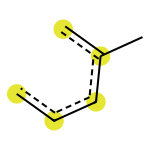

In [197]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
fpgen = AllChem.GetMorganGenerator(radius=2)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetFingerprint(mol,additionalOutput=ao)
bi = ao.GetBitInfoMap()
print(bi[872])
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
fpgen = AllChem.GetRDKitFPGenerator()
ao = AllChem.AdditionalOutput()
ao.CollectBitPaths()
fp = fpgen.GetFingerprint(mol,additionalOutput=ao)
rdkbi = ao.GetBitPaths()
print(rdkbi[1553])
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)

rdk_svg

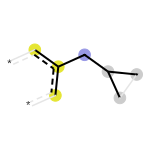

In [198]:
mfp2_svg

The default highlight colors for the Morgan bits indicate:

blue: the central atom in the environment
yellow: aromatic atoms
gray: aliphatic ring atoms
The default highlight colors for the RDKit bits indicate:

yellow: aromatic atoms
Note that in cases where the same bit is set by multiple atoms in the molecule (as for bit 1553 for the RDKit fingerprint in the example above), the drawing functions will display the first example. You can change this by specifying which example to show.

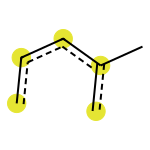

In [199]:
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, whichExample=1, useSVG=True)
rdk_svg

### Picking Diverse Molecules Using Fingerprints
A common task is to pick a small subset of diverse molecules from a larger set. The RDKit provides a number of approaches for doing this in the rdkit.SimDivFilters module. The most efficient of these uses the MaxMin algorithm.

### Generating Similarity Maps Using Fingerprints
Similarity maps are a way to visualize the atomic contributions to the similarity between a molecule and a reference molecule. They are in the rdkit.Chem.Draw.SimilarityMaps module. 

In [200]:
from rdkit import Chem
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

In [201]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

[12:23:01] DEPRECATION WARNING: please use AtomPairGenerator
[12:23:01] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[12:23:01] DEPRECATION WARNING: please use MorganGenerator


The types of atom pairs and torsions are normal (default), hashed and bit vector (bv). The types of the Morgan fingerprint are bit vector (bv, default) and count vector (count).

The function generating a similarity map for two fingerprints requires the specification of the fingerprint function and optionally the similarity metric. The default for the latter is the Dice similarity. Using all the default arguments of the Morgan fingerprint function, the similarity map can be generated.

[12:23:02] DEPRECATION WARNING: please use MorganGenerator
[12:23:02] DEPRECATION WARNING: please use MorganGenerator


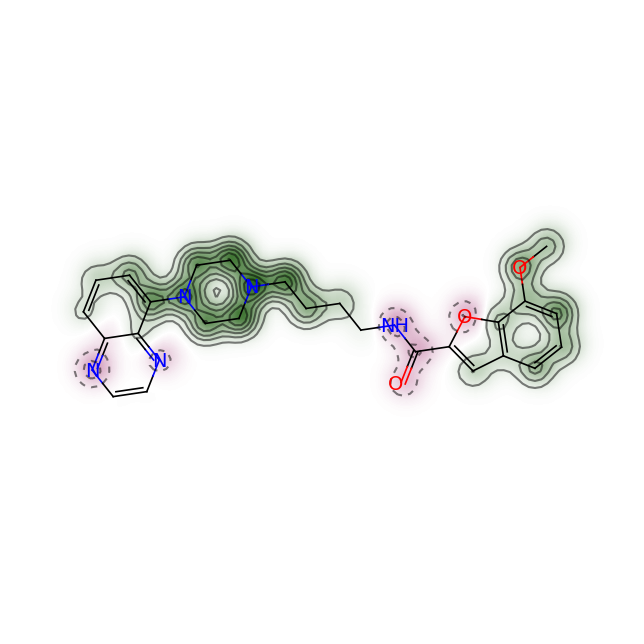

In [202]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

For a different type of Morgan (e.g. count) and radius = 1 instead of 2, as well as a different similarity metric (e.g. Tanimoto), the call becomes

[12:23:03] DEPRECATION WARNING: please use MorganGenerator
[12:23:03] DEPRECATION WARNING: please use MorganGenerator


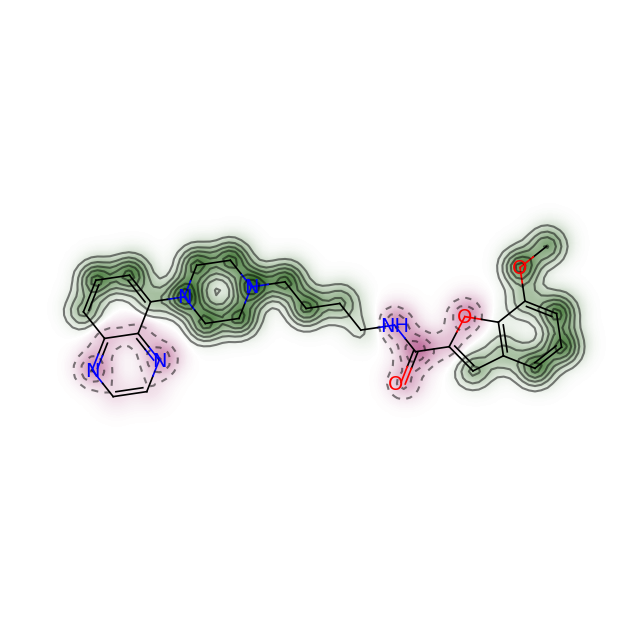

In [203]:
from rdkit import DataStructs
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, 
                                                               lambda m,idx: SimilarityMaps.GetMorganFingerprint(
                                                                   m, atomId=idx, radius=1, fpType='count'
                                                                   ),
                                                               metric=DataStructs.TanimotoSimilarity)

The convenience function GetSimilarityMapForFingerprint involves the normalisation of the atomic weights such that the maximum absolute weight is 1. Therefore, the function outputs the maximum weight that was found when creating the map.

In [204]:
print(maxweight)

0.05747126436781608


If one does not want the normalisation step, the map can be created like,

['0.05 ', '0.07 ', '0.05 ', '0.08 ', '0.05 ', '0.06 ', '0.03 ', '0.04 ', '-0.01 ', '-0.04 ', '-0.03 ', '-0.05 ', '0.01 ', '0.03 ', '0.07 ', '0.10 ', '0.12 ', '0.11 ', '0.09 ', '0.10 ', '0.09 ', '0.06 ', '0.03 ', '0.02 ', '-0.01 ', '-0.05 ', '0.00 ', '0.00 ', '-0.03 ', '0.02 ', '0.09 ', '0.11 ', '-0.04 ', '0.04 ']


[12:23:03] DEPRECATION WARNING: please use MorganGenerator
[12:23:03] DEPRECATION WARNING: please use MorganGenerator


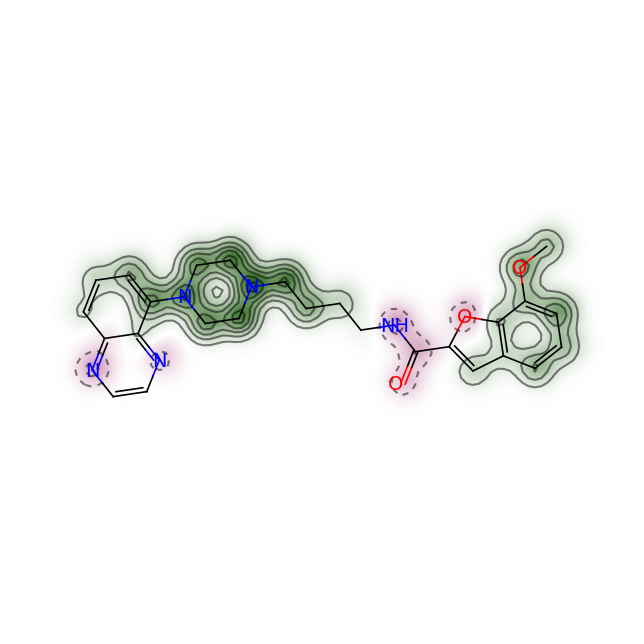

In [205]:
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)
print(["%.2f " % w for w in weights])
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, weights)

## Descriptor Calculation

In [206]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
print('TPSA = ', Descriptors.TPSA(m))
print('MolLogP = ', Descriptors.MolLogP(m))

TPSA =  37.3
MolLogP =  1.3848


### Calculating All Descriptors
The rdkit.Chem.Descriptors module provides a convenience function, CalcMolDescriptors(), to calculate all available descriptors for a molecule. CalcMolDescriptors() returns a dictionary with descriptor names as the keys and descriptor values as the values. 

In [207]:
vals = Descriptors.CalcMolDescriptors(m)
print(vals['TPSA'])
print(vals['NumHDonors'])

37.3
1


[12:23:04] DEPRECATION WARNING: please use MorganGenerator
[12:23:04] DEPRECATION WARNING: please use MorganGenerator
[12:23:04] DEPRECATION WARNING: please use MorganGenerator


CalcMolDescriptors() makes it easy to generate descriptors for a set of molecules and get the values into a pandas DataFrame

In [208]:
import pandas as pd
descrs = [Descriptors.CalcMolDescriptors(mol) for mol in mols]
df = pd.DataFrame(descrs)
df.head()
df.head(3)

[12:23:05] DEPRECATION WARNING: please use MorganGenerator
[12:23:05] DEPRECATION WARNING: please use MorganGenerator
[12:23:05] DEPRECATION WARNING: please use MorganGenerator
[12:23:05] DEPRECATION WARNING: please use MorganGenerator
[12:23:05] DEPRECATION WARNING: please use MorganGenerator
[12:23:05] DEPRECATION WARNING: please use MorganGenerator


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.287246,6.287246,0.678570,0.678570,0.037937,10.628571,913.146,860.73,912.437642,342,...,0,0,0,0,0,0,0,0,0,0
1,6.795932,6.795932,0.567083,0.567083,0.040484,9.672727,1433.906,1341.17,1432.750643,542,...,0,0,0,0,0,0,0,0,0,0


## Calculating Partial Charges

In [209]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
AllChem.ComputeGasteigerCharges(m)
m.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')

-0.04769375004654255

### Visualization of Descriptors
Similarity maps can be used to visualize descriptors that can be divided into atomic contributions.

The Gasteiger partial charges can be visualized as (using a different color scheme).

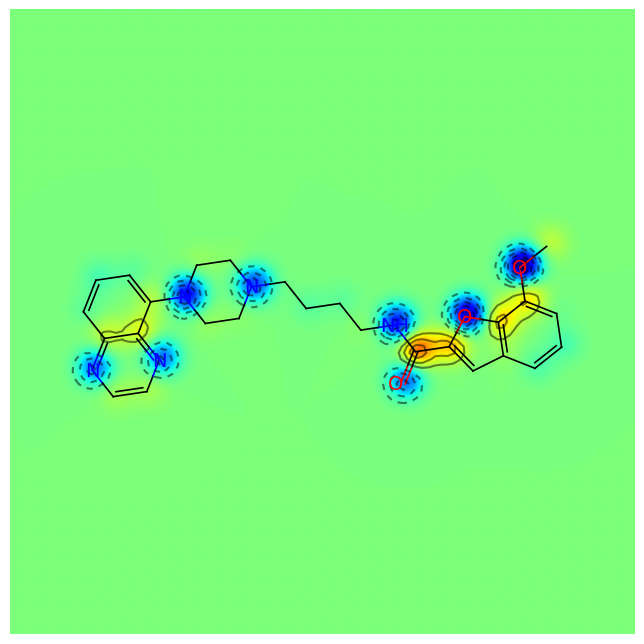

In [210]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

Calculate Crippen Contributions.


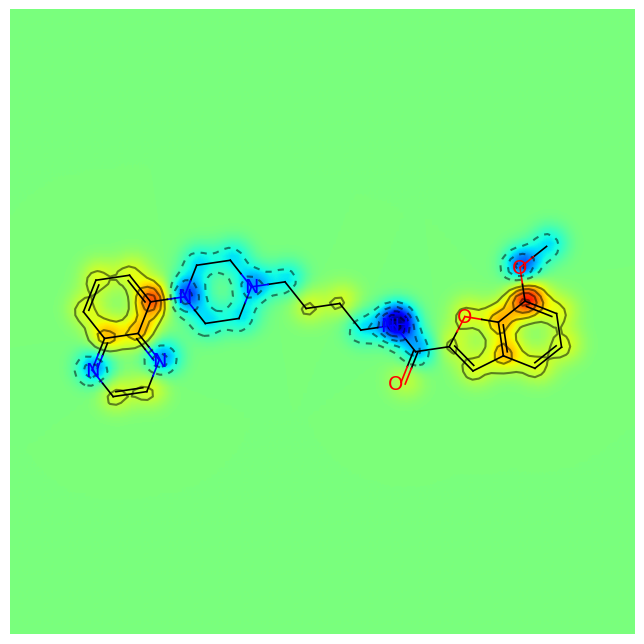

In [211]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)

## Chemical Reactions
The RDKit also supports applying chemical reactions to sets of molecules. One way of constructing chemical reactions is to use a SMARTS-based language similar to Daylight’s Reaction SMILES. 

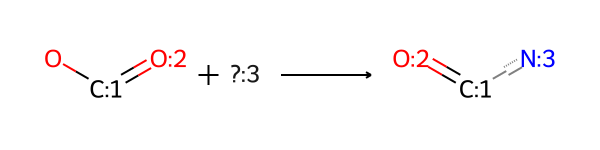

In [212]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
rxn

In [213]:
rxn.GetNumProductTemplates()

1

In [214]:
rxn.GetNumReactantTemplates()

2

In [215]:
ps = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'),Chem.MolFromSmiles('NC')))
len(ps)

1

In [216]:
len(ps[0])

1

In [217]:
Chem.MolToSmiles(ps[0][0])

'CNC(C)=O'

In [218]:
ps = rxn.RunReactants((Chem.MolFromSmiles('C(COC(=O)O)C(=O)O'),Chem.MolFromSmiles('NC')))
len(ps)

2

In [219]:
Chem.MolToSmiles(ps[0][0])

'CNC(=O)OCCC(=O)O'

In [220]:
Chem.MolToSmiles(ps[1][0])

'CNC(=O)CCOC(=O)O'

In [221]:
rxn = AllChem.ReactionFromRxnFile('./data/AmideBond.rxn')
rxn.GetNumReactantTemplates()

2

In [222]:
rxn.GetNumProductTemplates()

1

In [223]:
ps = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('NC')))
len(ps)


1

In [224]:
Chem.MolToSmiles(ps[0][0])

'CNC(C)=O'

It is, of course, possible to do reactions more complex than amide bond formation

In [225]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('OC=C'), Chem.MolFromSmiles('C=CC(N)=C')))
Chem.MolToSmiles(ps[0][0])

'NC1=CCCC(O)C1'

Note in this case that there are multiple mappings of the reactants onto the templates, so we have multiple product sets

In [226]:
len(ps)

4

You can use canonical smiles and a python dictionary to get the unique products.

In [227]:
uniqps = {}
for p in ps:
  smi = Chem.MolToSmiles(p[0])
  uniqps[smi] = p[0]

sorted(uniqps.keys())

['NC1=CCC(O)CC1', 'NC1=CCCC(O)C1']

Note that the molecules that are produced by the chemical reaction processing code are not sanitized, as this artificial reaction demonstrates.

In [228]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2][C:3]=[C:4].[C:5]=[C:6]>>[C:1]1=[C:2][C:3]=[C:4][C:5]=[C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('C=CC=C'), Chem.MolFromSmiles('C=C')))
Chem.MolToSmiles(ps[0][0])

'C1=CC=CC=C1'

In [229]:
p0 = ps[0][0]
Chem.SanitizeMol(p0)
Chem.MolToSmiles(p0)

'c1ccccc1'

## Drawing Chemical Reactions

In [230]:
from rdkit.Chem import Draw
rxn = AllChem.ReactionFromSmarts('[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])O.[N-:13]=[N+:14]=[N-:15]>C(Cl)Cl.C(=O)(C(=O)Cl)Cl>[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])[N:13]=[N+:14]=[N-:15]',useSmiles=True)
d2d = Draw.MolDraw2DCairo(800,300)
d2d.DrawReaction(rxn)
png = d2d.GetDrawingText()
open('./images/reaction1.o.png','wb+').write(png)

FileNotFoundError: [Errno 2] No such file or directory: './images/reaction1.o.png'

In [231]:
d2d = Draw.MolDraw2DCairo(800,300)
d2d.DrawReaction(rxn,highlightByReactant=True)
png = d2d.GetDrawingText()
open('./images/reaction1_highlight.o.png','wb+').write(png) 

FileNotFoundError: [Errno 2] No such file or directory: './images/reaction1_highlight.o.png'

PNG images of reactions include metadata allowing the reaction to be reconstructed

In [232]:
newRxn = AllChem.ReactionFromPNGString(png)
AllChem.ReactionToSmarts(newRxn)

'[#6H:5]1:[#6H:6]:[#6:7]2:[#6H:8]:[#7:9]:[#6H:10]:[#6H:11]:[#6:12]:2:[#6:3](:[#6H:4]:1)-[#6:2](=[#8:1])-[#8].[#7-:13]=[#7+:14]=[#7-:15]>[#6](-[#17])-[#17].[#6](=[#8])(-[#6](=[#8])-[#17])-[#17]>[#6H:5]1:[#6H:6]:[#6:7]2:[#6H:8]:[#7:9]:[#6H:10]:[#6H:11]:[#6:12]:2:[#6:3](:[#6H:4]:1)-[#6:2](=[#8:1])-[#7:13]=[#7+:14]=[#7-:15]'

### Advanced Reaction Functionality

Protecting Atoms

Sometimes, particularly when working with rxn files, it is difficult to express a reaction exactly enough to not end up with extraneous products. The RDKit provides a method of “protecting” atoms to disallow them from taking part in reactions.

This can be demonstrated re-using the amide-bond formation reaction used above. The query for amines isn’t specific enough, so it matches any nitrogen that has at least one H attached. So if we apply the reaction to a molecule that already has an amide bond, the amide N is also treated as a reaction site. 

In [233]:
rxn = AllChem.ReactionFromRxnFile('data/AmideBond.rxn')
acid = Chem.MolFromSmiles('CC(=O)O')
base = Chem.MolFromSmiles('CC(=O)NCCN')
ps = rxn.RunReactants((acid,base))
len(ps)

2

In [234]:
Chem.MolToSmiles(ps[0][0])

'CC(=O)N(CCN)C(C)=O'

In [235]:
Chem.MolToSmiles(ps[1][0])

'CC(=O)NCCNC(C)=O'

The first product corresponds to the reaction at the amide N.

We can prevent this from happening by protecting all amide Ns. Here we do it with a substructure query that matches amides and thioamides and then set the “_protected” property on matching atoms. 

In [236]:
amidep = Chem.MolFromSmarts('[N;$(NC=[O,S])]')
for match in base.GetSubstructMatches(amidep):
    base.GetAtomWithIdx(match[0]).SetProp('_protected','1')
    
ps = rxn.RunReactants((acid,base))
len(ps)

1

In [237]:
Chem.MolToSmiles(ps[0][0])

'CC(=O)NCCNC(C)=O'

#### Recap Implementation
Associated with the chemical reaction functionality is an implementation of the Recap algorithm. Recap uses a set of chemical transformations mimicking common reactions carried out in the lab in order to decompose a molecule into a series of reasonable fragments.

The RDKit rdkit.Chem.Recap implementation keeps track of the hierarchy of transformations that were applied. 

In [238]:
from rdkit import Chem
from rdkit.Chem import Recap
m = Chem.MolFromSmiles('c1ccccc1OCCOC(=O)CC')
hierarch = Recap.RecapDecompose(m)
type(hierarch)

rdkit.Chem.Recap.RecapHierarchyNode

In [239]:
hierarch.smiles

'CCC(=O)OCCOc1ccccc1'

In [240]:
ks=hierarch.children.keys()
sorted(ks)

['*C(=O)CC', '*CCOC(=O)CC', '*CCOc1ccccc1', '*OCCOc1ccccc1', '*c1ccccc1']

In [241]:
ks=hierarch.GetLeaves().keys()
ks=sorted(ks)
ks

['*C(=O)CC', '*CCO*', '*CCOc1ccccc1', '*c1ccccc1']

Notice that dummy atoms are used to mark points where the molecule was fragmented.

The nodes themselves have associated molecules. 

In [242]:
leaf = hierarch.GetLeaves()[ks[0]]
Chem.MolToSmiles(leaf.mol)

'*C(=O)CC'

#### BRICS Implementation
BRICS provides another method for fragmenting molecules along synthetically accessible bonds.

In [243]:
from rdkit.Chem import BRICS
with Chem.SDMolSupplier('data/cdk2.sdf') as cdk2mols:
  m1 = cdk2mols[0]
  m2 = cdk2mols[20]
sorted(BRICS.BRICSDecompose(m1))

['[14*]c1nc(N)nc2[nH]cnc12', '[3*]O[3*]', '[4*]CC(=O)C(C)C']

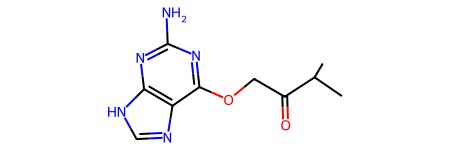

In [244]:
m1

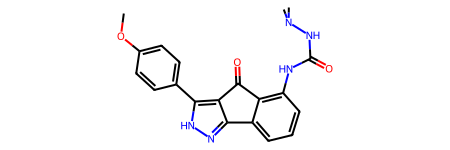

In [245]:
m2

In [246]:
sorted(BRICS.BRICSDecompose(m2))

['[1*]C(=O)NN(C)C',
 '[14*]c1[nH]nc2c1C(=O)c1c([16*])cccc1-2',
 '[16*]c1ccc([16*])cc1',
 '[3*]OC',
 '[5*]N[5*]']

Notice that RDKit BRICS implementation returns the unique fragments generated from a molecule and that the dummy atoms are tagged to indicate which type of reaction applies.

It’s quite easy to generate the list of all fragments for a group of molecule. 

In [247]:
allfrags=set()
with Chem.SDMolSupplier('data/cdk2.sdf') as cdk2mols:
  for m in cdk2mols:
     if m is None:
       continue
     pieces = BRICS.BRICSDecompose(m)
     allfrags.update(pieces)
len(allfrags)

90

In [248]:
sorted(allfrags)[:5]

['NS(=O)(=O)c1ccc(N/N=C2\\C(=O)Nc3ccc(Br)cc32)cc1',
 '[1*]C(=O)C(C)C',
 '[1*]C(=O)NN(C)C',
 '[1*]C(=O)NN1CC[NH+](C)CC1',
 '[1*]C(C)=O']

The BRICS module also provides an option to apply the BRICS rules to a set of fragments to create new molecules.

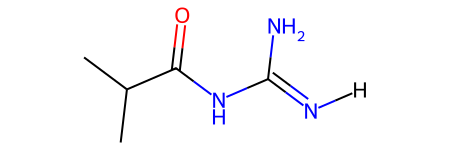

In [249]:
import random
random.seed(127)
fragms = [Chem.MolFromSmiles(x) for x in sorted(allfrags)]
random.seed(0xf00d)
ms = BRICS.BRICSBuild(fragms) # The result is a generator object and returns molecules on request. 
prods = [next(ms) for x in range(10)]
prods[0]

The molecules have not been sanitized, so it’s a good idea to at least update the valences before continuing.

In [250]:
for prod in prods:
    prod.UpdatePropertyCache(strict=False)

Chem.MolToSmiles(prods[0],True)

'[H]/N=C(\\N)NC(=O)C(C)C'

In [251]:
Chem.MolToSmiles(prods[1],True)

'CC(C)C(=O)N/C=C1\\C(=O)Nc2ccc3ncsc3c21'

In [252]:
Chem.MolToSmiles(prods[2],True)

'CC(C)C(=O)N/C=C1\\C(=O)Nc2ccccc21'

In [253]:
Chem.MolToSmiles(prods[3],True)

'CNC(=O)C(C)C'

By default those results come back in a random order (technically the example above will always return the same results since we seeded Python’s random number generator just before calling BRICSBuild()). If you want the results to be returned in a consistent order use the scrambleReagents argument.

In [254]:
ms = BRICS.BRICSBuild(fragms, scrambleReagents=False)
prods = [next(ms) for x in range(10)]
for prod in prods:
    prod.UpdatePropertyCache(strict=False)

Chem.MolToSmiles(prods[0],True)

'COC(=O)C(C)C'

In [255]:
Chem.MolToSmiles(prods[1],True)

'[H]/N=C(\\N)NC(=O)C(C)C'

In [256]:
Chem.MolToSmiles(prods[2],True)

'CC(C)C(=O)N/C=C1\\C(=O)Nc2ccc3ncsc3c21'

#### Other fragmentation approaches
In addition to the methods described above, the RDKit provide a very flexible generic function for fragmenting molecules along user-specified bonds.

Here’s a quick demonstration of using that to break all bonds between atoms in rings and atoms not in rings. We start by finding all the atom pairs. 

In [257]:
m = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
bis

((0, 1), (4, 3), (6, 5), (7, 8))

In [258]:
# corresponding bond indices
bs = [m.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis]
bs

[0, 3, 5, 7]

In [259]:
# use bond indices as input for fragmentstion function.
nm = Chem.FragmentOnBonds(m,bs)

the output is a molecule that has dummy atoms marking the places where bonds were broken.

In [260]:
Chem.MolToSmiles(nm,True)

'*C1CC([4*])C1[6*].[1*]C.[3*]O.[5*]CC[8*].[7*]C1CC1'

By default the attachment points are labelled (using isotopes) with the index of the atom that was removed. We can also provide our own set of atom labels in the form of pairs of unsigned integers. The first value in each pair is used as the label for the dummy that replaces the bond’s begin atom, the second value in each pair is for the dummy that replaces the bond’s end atom. Here’s an example, repeating the analysis above and marking the positions where the non-ring atoms were with the label 10 and marking the positions where the ring atoms were with label 1. 

In [261]:
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
bs = []
labels=[]
for bi in bis:
   b = m.GetBondBetweenAtoms(bi[0],bi[1])
   if b.GetBeginAtomIdx()==bi[0]:
       labels.append((10,1))
   else:
       labels.append((1,10))
   bs.append(b.GetIdx())
nm = Chem.FragmentOnBonds(m,bs,dummyLabels=labels)
Chem.MolToSmiles(nm,True)

'[1*]C.[1*]CC[1*].[1*]O.[10*]C1CC([10*])C1[10*].[10*]C1CC1'

## Chemical Features and Pharmacophores

### Chemical Features
Chemical features in the RDKit are defined using a SMARTS-based feature definition language (described in detail in the RDKit book). To identify chemical features in molecules, you first must build a feature factory. 

In [262]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

m = Chem.MolFromSmiles('OCc1ccccc1CN')
feats = factory.GetFeaturesForMol(m)
print(len(feats))

print(feats[0].GetFamily())
print(feats[0].GetType())
print(feats[0].GetAtomIds())
print(feats[4].GetFamily())
print(feats[4].GetAtomIds())

8
Donor
SingleAtomDonor
(0,)
Aromatic
(2, 3, 4, 5, 6, 7)


If the molecule has coordinates, then the features will also have reasonable locations.

In [263]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m)
list(feats[0].GetPos())

[2.070536761160785, -2.335674960409047, 0.0]

### 2D Pharmacophore Fingerprints
Combining a set of chemical features with the 2D (topological) distances between them gives a 2D pharmacophore. When the distances are binned, unique integer ids can be assigned to each of these pharmacophores and they can be stored in a fingerprint. Details of the encoding are in the The RDKit Book.

Generating pharmacophore fingerprints requires chemical features generated via the usual RDKit feature-typing mechanism. 

In [264]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
fdefName = ('data/MinimalFeatures.fdef')
featFactory = ChemicalFeatures.BuildFeatureFactory(fdefName)

The fingerprints themselves are calculated using a signature (fingerprint) factory, which keeps track of all the parameters required to generate the pharmacophore.

In [265]:
from rdkit.Chem.Pharm2D.SigFactory import SigFactory
sigFactory = SigFactory(featFactory,minPointCount=2,maxPointCount=3)
sigFactory.SetBins([(0,2),(2,5),(5,8)])
sigFactory.Init()
sigFactory.GetSigSize()

885

The signature factory is now ready to be used to generate fingerprints, a task which is done using the rdkit.Chem.Pharm2D.Generate module.

In [266]:
from rdkit.Chem.Pharm2D import Generate
mol = Chem.MolFromSmiles('OCC(=O)CCCN')
fp = Generate.Gen2DFingerprint(mol, sigFactory)
print(len(fp))
print(fp.GetNumOnBits())

885
57


Details about the bits themselves, including the features that are involved and the binned distance matrix between the features, can be obtained from the signature factory.

In [267]:
print(list(fp.GetOnBits())[:5])
print('1 =', sigFactory.GetBitDescription(1))
print('2 =', sigFactory.GetBitDescription(1))
print('8 = ', sigFactory.GetBitDescription(8))
print(list(fp.GetOnBits())[-5:])
print('707 = ', sigFactory.GetBitDescription(707))
print('714 = ', sigFactory.GetBitDescription(714))

[1, 2, 6, 7, 8]
1 = Acceptor Acceptor |0 1|1 0|
2 = Acceptor Acceptor |0 1|1 0|
8 =  Acceptor Donor |0 2|2 0|
[704, 706, 707, 708, 714]
707 =  Donor Donor PosIonizable |0 1 2|1 0 1|2 1 0|
714 =  Donor Donor PosIonizable |0 2 2|2 0 0|2 0 0|


In [268]:
sigFactory.skipFeats=['PosIonizable']
sigFactory.Init()
sigFactory.GetSigSize()

510

In [269]:
fp2 = Generate.Gen2DFingerprint(mol,sigFactory)
fp2.GetNumOnBits()

36

Another possible set of feature definitions for 2D pharmacophore fingerprints in the RDKit are those published by Gobbi and Poppinger. The module rdkit.Chem.Pharm2D.Gobbi_Pharm2D has a pre-configured signature factory for these fingerprint types.

In [270]:
from rdkit import Chem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate
m = Chem.MolFromSmiles('OCC=CC(=O)O')
fp = Generate.Gen2DFingerprint(m,Gobbi_Pharm2D.factory)
print(fp.GetNumOnBits())
print(list(fp.GetOnBits()))
print(Gobbi_Pharm2D.factory.GetBitDescription(157))
print(Gobbi_Pharm2D.factory.GetBitDescription(30184))

8
[23, 30, 150, 154, 157, 185, 28878, 30184]
HA HD |0 3|3 0|
HA HD HD |0 3 0|3 0 3|0 3 0|


## Molecular Fragments
The RDKit contains a collection of tools for fragmenting molecules and working with those fragments. Fragments are defined to be made up of a set of connected atoms that may have associated functional groups. This is more easily demonstrated than explained. 

In [271]:
fName=os.path.join(RDConfig.RDDataDir,'FunctionalGroups.txt')
from rdkit.Chem import FragmentCatalog
fparams = FragmentCatalog.FragCatParams(1,6,fName)
fparams.GetNumFuncGroups()

39

In [272]:
fcat=FragmentCatalog.FragCatalog(fparams)
fcgen=FragmentCatalog.FragCatGenerator()
m = Chem.MolFromSmiles('OCC=CC(=O)O')
fcgen.AddFragsFromMol(m,fcat)

3

In [273]:
fcat.GetEntryDescription(0)

'C<-O>C'

In [274]:
fcat.GetEntryDescription(1)

'C=C<-C(=O)O>'

In [275]:
fcat.GetEntryDescription(2)

'C<-C(=O)O>=CC<-O>'

The fragments are stored as entries in a rdkit.Chem.rdfragcatalog.FragCatalog. Notice that the entry descriptions include pieces in angular brackets (e.g. between ‘<’ and ‘>’). These describe the functional groups attached to the fragment. For example, in the above example, the catalog entry 0 corresponds to an ethyl fragment with an alcohol attached to one of the carbons and entry 1 is an ethylene with a carboxylic acid on one carbon. Detailed information about the functional groups can be obtained by asking the fragment for the ids of the functional groups it contains and then looking those ids up in the rdkit.Chem.rdfragcatalog.FragCatParams object.

In [276]:
list(fcat.GetEntryFuncGroupIds(2))

[34, 1]

In [277]:
Chem.MolToSmarts(fparams.GetFuncGroup(1))

'*-C(=O)[O&D1]'

In [278]:
fparams.GetFuncGroup(1).GetProp('_Name')

'-C(=O)O'

The catalog is hierarchical: smaller fragments are combined to form larger ones. From a small fragment, one can find the larger fragments to which it contributes using the rdkit.Chem.rdfragcatalog.FragCatalog.GetEntryDownIds() method.

In [279]:
fcat=FragmentCatalog.FragCatalog(fparams)
m = Chem.MolFromSmiles('OCC(NC1CC1)CCC')
fcgen.AddFragsFromMol(m,fcat)

15

In [280]:
fcat.GetEntryDescription(0)

'C<-O>C'

In [281]:
list(fcat.GetEntryDownIds(0))

[3, 4]

The fragments from multiple molecules can be added to a catalog.

In [282]:
with Chem.SmilesMolSupplier('data/bzr.smi') as suppl:
   ms = [x for x in suppl]
fcat=FragmentCatalog.FragCatalog(fparams)
for m in ms:
    nAdded=fcgen.AddFragsFromMol(m,fcat)
print(fcat.GetNumEntries())
print(fcat.GetEntryDescription(0))
print(fcat.GetEntryDescription(100))

1169
Cc
cc-nc(C)n


The fragments in a catalog are unique, so adding a molecule a second time doesn’t add any new entries.

In [283]:
fcgen.AddFragsFromMol(ms[0],fcat)
fcat.GetNumEntries()

1169

Once a rdkit.Chem.rdfragcatalog.FragCatalog has been generated, it can be used to fingerprint molecules.

In [284]:
fpgen = FragmentCatalog.FragFPGenerator()
fp = fpgen.GetFPForMol(ms[8],fcat)
fp.GetNumOnBits()

189

The rest of the machinery associated with fingerprints can now be applied to these fragment fingerprints. For example, it’s easy to find the fragments that two molecules have in common by taking the intersection of their fingerprints.

In [285]:
fp2 = fpgen.GetFPForMol(ms[7],fcat)
andfp = fp&fp2
obl = list(andfp.GetOnBits())
fcat.GetEntryDescription(obl[-1])

'ccc(cc)NC<=O>'

In [286]:
fcat.GetEntryDescription(obl[-5])

'c<-X>ccc(N)cc'

or we can find the fragments that distinguish one molecule from another.

In [287]:
combinedFp=fp&(fp^fp2) # can be more efficient than fp&(!fp2)
obl = list(combinedFp.GetOnBits())
fcat.GetEntryDescription(obl[-1])

'cccc(N)cc'

Or we can use the bit ranking functionality from the rdkit.ML.InfoTheory.rdInfoTheory.InfoBitRanker class to identify fragments that distinguish actives from inactives.

## R-Group Decomposition

In [288]:
from rdkit import Chem
from rdkit.Chem import rdRGroupDecomposition as rdRGD
with Chem.SmilesMolSupplier('./data/s1p_chembldoc89753.txt',
                            delimiter=",", smilesColumn=9,nameColumn=10) as suppl:
    ms = [x for x in suppl if x is not None]

print(len(ms))

core = Chem.MolFromSmarts('[*:1]c1nc([*:2])on1')

res, unmatched = rdRGD.RGroupDecompose([core],ms,asSmiles=True)
print('unmatched = ', unmatched)
print('total res = ', len(res))
print(res[:2])

40
unmatched =  []
total res =  40
[{'Core': 'n1oc([*:2])nc1[*:1]', 'R1': 'O=C(O)CCCC1NCCOc2c1cccc2[*:1]', 'R2': 'CC(C)Oc1ccc([*:2])cc1Cl'}, {'Core': 'n1oc([*:2])nc1[*:1]', 'R1': 'O=C(O)CCC1NCCOc2c1cccc2[*:1]', 'R2': 'CC(C)Oc1ccc([*:2])cc1Cl'}]


The unmatched return value has the indices of the molecules that did not match a core; in this case there are none. The other result is a list with one dict for each molecule; each dict contains the core that matched the molecule (in this case there was only one) and the molecule’s R groups.

As an aside, if you are a Pandas user, it’s very easy to get the R-group decomposition results into a DataFrame.

In [289]:
import pandas as pd
res,unmatched = rdRGD.RGroupDecompose([core],ms,asSmiles=True,asRows=False)
df= pd.DataFrame(res)
df.head()

,Core,R1,R2
0,n1oc([*:2])nc1[*:1],O=C(O)CCCC1NCCOc2c1cccc2[*:1],CC(C)Oc1ccc([*:2])cc1Cl
1,n1oc([*:2])nc1[*:1],O=C(O)CCC1NCCOc2c1cccc2[*:1],CC(C)Oc1ccc([*:2])cc1Cl
2,n1oc([*:2])nc1[*:1],O=C(O)CCC1COc2ccc([*:1])cc2CN1,CC(C)Oc1ccc([*:2])cc1Cl
3,n1oc([*:2])nc1[*:1],O=C(O)CCCC1NCCOc2c1cccc2[*:1],CC(C)Oc1ncc([*:2])cc1Cl
4,n1oc([*:2])nc1[*:1],O=C(O)CCCC1NCCOc2c1cccc2[*:1],CC(C)Oc1ncc([*:2])cc1Cl


It is not necessary to label the attachment points on the core, if you leave them out the code will automatically assign labels.

In [290]:
core2 = Chem.MolFromSmarts('c1ncon1')
res,unmatched = rdRGD.RGroupDecompose([core2],ms,asSmiles=True)
res[:2]

[{'Core': 'n1oc([*:1])nc1[*:2]',
  'R1': 'CC(C)Oc1ccc([*:1])cc1Cl',
  'R2': 'O=C(O)CCCC1NCCOc2c1cccc2[*:2]'},
 {'Core': 'n1oc([*:1])nc1[*:2]',
  'R1': 'CC(C)Oc1ccc([*:1])cc1Cl',
  'R2': 'O=C(O)CCC1NCCOc2c1cccc2[*:2]'}]

## Non-Chemical Functionality

#### Bit vectors
Bit vectors are containers for efficiently storing a set number of binary values, e.g. for fingerprints. The RDKit includes two types of fingerprints differing in how they store the values internally; the two types are easily interconverted but are best used for different purpose:

SparseBitVects store only the list of bits set in the vector; they are well suited for storing very large, very sparsely occupied vectors like pharmacophore fingerprints. Some operations, such as retrieving the list of on bits, are quite fast. Others, such as negating the vector, are very, very slow.
ExplicitBitVects keep track of both on and off bits. They are generally faster than SparseBitVects, but require more memory to store.

## Advanced Topics/Warnings
### Editing Molecules
Some of the functionality provided allows molecules to be edited “in place”

In [291]:
m = Chem.MolFromSmiles('c1ccccc1')
m.GetAtomWithIdx(0).SetAtomicNum(7)
Chem.SanitizeMol(m)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [292]:
Chem.MolToSmiles(m)

'c1ccncc1'

Do not forget the sanitization step, without it one can end up with results that look ok (so long as you don’t think).

In [293]:
m = Chem.MolFromSmiles('c1ccccc1')
m.GetAtomWithIdx(0).SetAtomicNum(8)
Chem.MolToSmiles(m)

'c1ccocc1'

but that are, of course, complete nonsense, as sanitization will indicate.

In [294]:
Chem.SanitizeMol(m)

[12:23:35] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5


KekulizeException: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5

More complex transformations can be carried out using the rdkit.Chem.rdchem.RWMol class

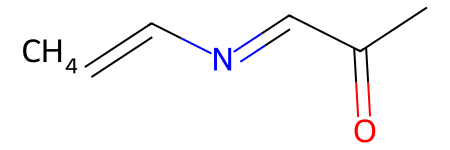

In [295]:
m = Chem.MolFromSmiles('CC(=O)C=CC=C')
mw = Chem.RWMol(m)
mw.ReplaceAtom(4,Chem.Atom(7))
mw.AddAtom(Chem.Atom(6))
mw

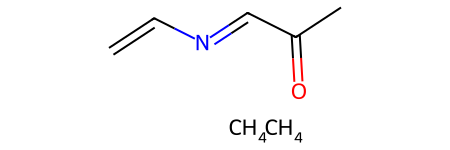

In [296]:
mw.AddAtom(Chem.Atom(6))
mw

In [297]:
mw.AddBond(6,7,Chem.BondType.SINGLE)

7

In [298]:
mw.AddBond(8,3,Chem.BondType.SINGLE)

8

In [299]:
mw.RemoveAtom(0)
mw.GetNumAtoms()

8

The RWMol can be used just like an ROMol.

In [300]:
Chem.MolToSmiles(mw)
Chem.SanitizeMol(mw)
Chem.MolToSmiles(mw)


'CC=CN=C(C)C=O'

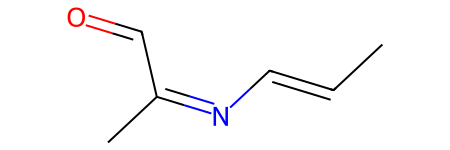

In [301]:
mw

The RDKit also has functionality enabling batch edits of molecules which provides a more efficient way to remove multiple atoms or bonds at once.

In [302]:
m = Chem.MolFromSmiles('CC(=O)C=CC=C')
mw = Chem.RWMol(m)
mw.BeginBatchEdit()
mw.RemoveAtom(3)

# None of the changes actually happen until we “commit” them.

Chem.MolToSmiles(mw)
Chem.MolToSmiles(mw)

'C=CC=CC(C)=O'

You can make this more concise using a context manager, which takes care of the commit for you

In [303]:
with Chem.RWMol(m) as mw:
    mw.RemoveAtom(3)
    mw.RemoveBond(1,2)

Chem.MolToSmiles(mw)

'C=CC.CC.O'

# Filtering Molecular Datasets
Several sets of rules exist for estimating the likelihood of a molecule exhibiting drug-like behaviour. It’s worth noting that these are rules of thumb, and that many examples of approved small molecule drugs exist that disobey these rules.

## Lipinski Rule of 5

Lipinski’s “Rule of 5” was introduced to estimate the oral bioavailability of molecules. Poor absorption is likely if the molecule violates more than one of the following conditions:

Molecular Weight <= 500 Da

No. Hydrogen Bond Donors <= 5

No. Hydrogen Bond Acceptors <= 10

LogP <= 5

In [304]:
from rdkit import Chem
from rdkit.Chem import Descriptors
mol = Chem.MolFromSmiles('CC(=O)Nc1ccc(O)cc1')  # e.g. Paracetamol
MW = Descriptors.MolWt(mol)
HBA = Descriptors.NOCount(mol)
HBD = Descriptors.NHOHCount(mol)
LogP = Descriptors.MolLogP(mol)
conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
pass_ro5 = conditions.count(True) >= 3
print(pass_ro5)

True


### Filtering Unwanted Substructures

Pan Assay Interference Compounds (or PAINS) are molecules that display non-specific binding, leading to unwanted side effects and false-positives in virtual screening. Common PAINS motifs include toxoflavin, isothiazolones, hydroxyphenyl hydrazones, curcumin, phenolsulfonamides, rhodanines, enones, quinones, and catechols.

The Brenk filter removes molecules containing substructures with undesirable pharmacokinetics or toxicity. These include sulfates and phosphates that contribute to unfavourable pharmacokinetics, nitro groups which are mutagenic and 2-halopyridines and thiols which are both reactive.

The NIH filter, defined a list of functional groups with undesirable properties. These are split into those with reactive functionalities (including Michael acceptors, aldehydes, epoxides, alkyl halides, metals, 2-halo pyridines, phosphorus nitrogen bonds, α-chloroketones and β-lactams) and medicinal chemistry exclusions (including oximes, crown ethers, hydrazines, flavanoids, polyphenols, primary halide sulfates and multiple nitro groups).

In [305]:
from rdkit import Chem
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

mol = Chem.MolFromSmiles('CC1=C(C=C(C=C1)N2C(=O)C(=C(N2)C)N=NC3=CC=CC(=C3O)C4=CC(=CC=C4)C(=O)O)C')  # e.g. Eltrombopag

params_pains = FilterCatalogParams()
params_pains.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_A)

True

In [306]:
# PAINS flag

catalog_pains = FilterCatalog(params_pains)
flag = catalog_pains.HasMatch(mol)  # Checks if there is a matching PAINS
print("PAINs: ", flag)

PAINs:  True


In [307]:
# Brenk Flag
params_unwanted = FilterCatalogParams()
params_unwanted.AddCatalog(FilterCatalogParams.FilterCatalogs.BRENK)

True

In [308]:
catalog_unwanted = FilterCatalog(params_unwanted)
flag = catalog_unwanted.HasMatch(mol)  # Checks if there is a matching unwanted substructure
print("Brenk: ", flag)

Brenk:  True


In [309]:
# NIH Flag
params_nih = FilterCatalogParams()
params_nih.AddCatalog(FilterCatalogParams.FilterCatalogs.NIH)

True

In [310]:
catalog_nih = FilterCatalog(params_nih)
flag = catalog_nih.HasMatch(mol)  # Checks if there is a matching NIH
print("NIH: ", flag)

NIH:  True


All of the available filters can also be considered at once. Additional information such as the class and description of the unwanted substructures can be obtained using the FilterCatalogEntry object.

In [311]:
from rdkit import Chem
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

mol = Chem.MolFromSmiles('CC1=C(C=C(C=C1)N2C(=O)C(=C(N2)C)N=NC3=CC=CC(=C3O)C4=CC(=CC=C4)C(=O)O)C')  # e.g. Eltrombopag

# ALL Filters
params_all = FilterCatalogParams()
params_all.AddCatalog(FilterCatalogParams.FilterCatalogs.ALL)

True

In [312]:
catalog_all = FilterCatalog(params_all)

print([entry.GetProp('FilterSet') for entry in catalog_all.GetMatches(mol)])

print([entry.GetDescription() for entry in catalog_all.GetMatches(mol)])

['PAINS_A', 'Brenk', 'NIH', 'ChEMBL23_Dundee', 'ChEMBL23_BMS', 'ChEMBL23_MLSMR', 'ChEMBL23_Inpharmatica', 'ChEMBL23_LINT']
['azo_A(324)', 'diazo_group', 'azo_aryl', 'diazo group', 'azo_aryl', 'Azo', 'Filter5_azo', 'acyclic N-,=N and not N bound to carbonyl or sulfone']
